# Applications of Data Science

# Lab 1

# Exploring Time Series Data

(Executing in Python the code requirements provided in R by the course instructors)

## Overview

Time series models are used in a wide range of applications, particularly for forecasting. 

This notebook contains lab material to familarize yourself with key aspects of time series analysis. You will perform analyses on a time series of California dairy data. Specifically, you will explore the structure of the time series and forecast the monthly production of fresh milk in the state of California. 

This exploration is performed in two steps:

- Explore the characteristics of the time series data.
- Decompose the time series of monthly milk production into trend, seasonal components, and remainder components. 
- Apply time series models to the remainder component of the time series.
- Forecast the production of monthly milk production for a 12 month period. 

## What you will need

To complete this lab, you will need the following:

- A web browser and Internet connection 
- An Azure Machine Learning workspace
- The lab files for this lab

**Note** To set up the required environment for the lab, follow the instructions in the [Setup guide](https://aka.ms/edx-dat203.3x-setup). 


## Summary

In this lab you have learned to work with and analyze time series data. Specifically, you have done the following:

- Examined the properties of time series objects.
- Plotted time series data.
- Decomposed time series data into its trend, seasonal, and remainder components.
- Modeled the remainder components as AR, MA, ARMA and ARIMA models. 
- Created and evaluated difference series methods.
- Constructed and evaluated a forecasting model. 

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6


TODO
- import the data. 
(doing this locally, not in AML Studio)
- standard examination

In [813]:

df = pd.read_csv('cadairydata.csv')


In [22]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
Unnamed: 0           228 non-null int64
Year.Month           228 non-null float64
Month.Number         228 non-null int64
Year                 228 non-null int64
Month                228 non-null object
Cotagecheese.Prod    228 non-null float64
Icecream.Prod        228 non-null float64
Milk.Prod            228 non-null float64
N.CA.Fat.Price       228 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 16.1+ KB


In [23]:

df.head()


,Unnamed: 0,Year.Month,Month.Number,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price
0,1,1995.01,1,1995,Jan,4.370,51.595,2.112,0.9803
1,2,1995.02,2,1995,Feb,3.695,56.086,1.932,0.8924
2,3,1995.03,3,1995,Mar,4.538,68.453,2.162,0.8924
3,4,1995.04,4,1995,Apr,4.280,65.722,2.130,0.8967
4,5,1995.05,5,1995,May,4.470,73.730,2.227,0.8967


In [24]:

df.isnull().sum()


Unnamed: 0           0
Year.Month           0
Month.Number         0
Year                 0
Month                0
Cotagecheese.Prod    0
Icecream.Prod        0
Milk.Prod            0
N.CA.Fat.Price       0
dtype: int64

228 rows, month is an object (string), the rest are numbers. No nulls.

TODO (from lab R file)

- 1) New column that is "flexible R data-time class" 
  (convert a string to ttime. Equvalent is to_datetime?)
- 2) convert month ot "ordered R factor class" 
- 3) get rid of unneeded columns


#1) New datetime column
Pandas time series functions (new to me): https://pandas.pydata.org/pandas-docs/stable/api.html#id10

In [814]:

#arbitrarily assigning the first of the day b/c datetime raises an error otherwise
df['DateTime']=pd.to_datetime({'year': df['Year'],'month': df['Month.Number'],'day':1},errors='raise')


In [26]:
df.head()

,Unnamed: 0,Year.Month,Month.Number,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,DateTime
0,1,1995.01,1,1995,Jan,4.370,51.595,2.112,0.9803,1995-01-01
1,2,1995.02,2,1995,Feb,3.695,56.086,1.932,0.8924,1995-02-01
2,3,1995.03,3,1995,Mar,4.538,68.453,2.162,0.8924,1995-03-01
3,4,1995.04,4,1995,Apr,4.280,65.722,2.130,0.8967,1995-04-01
4,5,1995.05,5,1995,May,4.470,73.730,2.227,0.8967,1995-05-01


In [27]:
#checking data type for DateTime
df.dtypes

Unnamed: 0                    int64
Year.Month                  float64
Month.Number                  int64
Year                          int64
Month                        object
Cotagecheese.Prod           float64
Icecream.Prod               float64
Milk.Prod                   float64
N.CA.Fat.Price              float64
DateTime             datetime64[ns]
dtype: object

#2: R uses a function to make month an ordered factor. 

python's categorical class is similar
Also, the use only the first 3 letters of the df's months to match the 3 letter categories

In [815]:

orderedcats = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


In [816]:

df['Month']=df['Month'].str.slice(0,3)
df['Month']=df['Month'].astype('category',ordered=True,categories=orderedcats)


#3: get rid of unneeded columns


In [817]:

df.drop(['Year.Month','Month.Number'],axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

df.head()


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,DateTime
0,1995,Jan,4.370,51.595,2.112,0.9803,1995-01-01
1,1995,Feb,3.695,56.086,1.932,0.8924,1995-02-01
2,1995,Mar,4.538,68.453,2.162,0.8924,1995-03-01
3,1995,Apr,4.280,65.722,2.130,0.8967,1995-04-01
4,1995,May,4.470,73.730,2.227,0.8967,1995-05-01


In [818]:
#The R notebook head has timezones on it too. Not going to bother with that for this.
df['DateTime'].head(20)

0    1995-01-01
1    1995-02-01
2    1995-03-01
3    1995-04-01
4    1995-05-01
5    1995-06-01
6    1995-07-01
7    1995-08-01
8    1995-09-01
9    1995-10-01
10   1995-11-01
11   1995-12-01
12   1996-01-01
13   1996-02-01
14   1996-03-01
15   1996-04-01
16   1996-05-01
17   1996-06-01
18   1996-07-01
19   1996-08-01
Name: DateTime, dtype: datetime64[ns]

In [32]:
df[df.DateTime > '2012-12-01']

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,DateTime
216,2013,Jan,2.282,62.612,3.462,1.7744,2013-01-01
217,2013,Feb,1.941,66.274,3.231,1.6224,2013-02-01
218,2013,Mar,2.150,75.770,3.676,1.6968,2013-03-01
219,2013,Apr,2.217,76.396,3.622,1.7444,2013-04-01
220,2013,May,2.341,80.899,3.720,1.8552,2013-05-01
221,2013,Jun,2.694,92.091,3.489,1.8314,2013-06-01
222,2013,Jul,2.433,84.026,3.373,1.6923,2013-07-01
223,2013,Aug,2.169,78.382,3.400,1.6273,2013-08-01
224,2013,Sep,2.193,74.871,3.197,1.5519,2013-09-01
225,2013,Oct,2.284,70.011,3.338,1.5566,2013-10-01


In [819]:
#Going to want to reindex the df for eaase of use.
df = df.rename(df['DateTime'])


#### TODO: Create a Time Series Plot

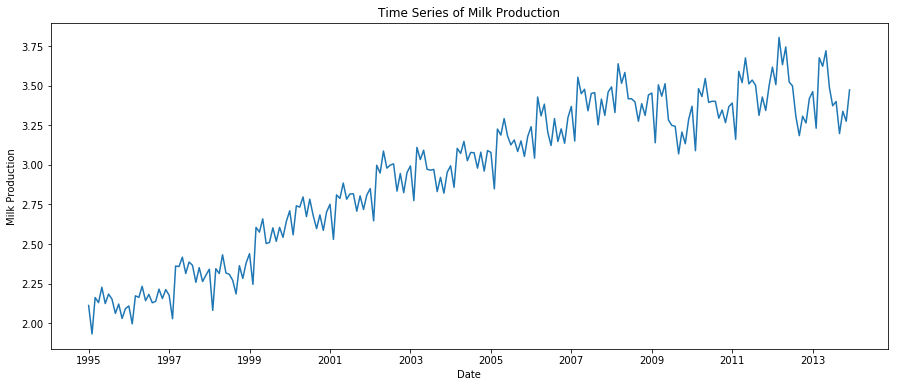

In [61]:
plt.plot(df.DateTime,df['Milk.Prod'])
plt.title('Time Series of Milk Production')
plt.xlabel('Date')
plt.ylabel('Milk Production')
plt.show()

- Increases year over year, except for dip around great recession
- appears to have a annual shape to it too, a seasonal element

#### TODO:Explore Statistical Properties of Time Series

- Autocorrelation function / ACF

In [62]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf


https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [71]:

def test_stationary(timeseries,title=''):
    
    rollmean = timeseries.rolling(window=12).mean()
    rollstd = timeseries.rolling(window=12).std()
    
    #Plot the rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rollmean,color='red',label='RollMean')
    std = plt.plot(rollstd,color='purple',label='RollingStd')
    
    #tstring = timeseries.name
    plt.legend(loc='best')
    plt.title('Rolling Mean and Stdev of ' + title )
    plt.show(block=False)
                
    #Dickey-Fullyer Test    
    print('Dickey-Fuller Test: ')
    dtest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dtest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,value in dtest[4].items():
        dfoutput['Critical Value (%s)'%i] = value
    print(dfoutput)
    
    

In [72]:
ts = df['Milk.Prod'] 
ts.head(10)

1995-01-01    2.112
1995-02-01    1.932
1995-03-01    2.162
1995-04-01    2.130
1995-05-01    2.227
1995-06-01    2.124
1995-07-01    2.184
1995-08-01    2.152
1995-09-01    2.062
1995-10-01    2.121
Name: Milk.Prod, dtype: float64

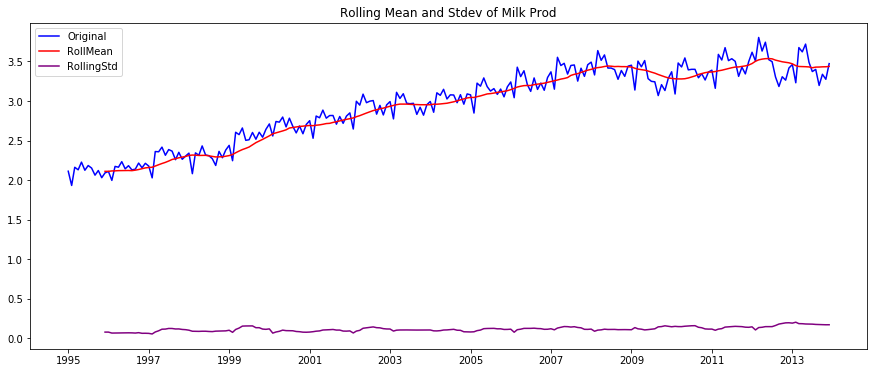

Dickey-Fuller Test: 
Test Statistic                  -1.882423
p-value                          0.340374
#Lags Used                      12.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


In [90]:
test_stationary(ts,'Milk Prod')

- ***NOTE*** Signed values should be compared, not absolute values... so -2 is beneath -1.
- Rolling Std (Variance) is pretty even
- Rolling mean definitely increases in time, so its ***not stationary***
- Test Stat of -1.88 > critical value for 10%, meaning there is less than 90% confidence that the real mean is captured by the model.


###Statistical Properties of Time Series

In [99]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [102]:



def acfplt(ts):
    lag_acf= acf(ts,nlags=20)
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96,linestyle='--',color='gray')
    plt.axhline(y=1.96,linestyle='--',color='gray')
    plt.title('Autocorrelation Fxn')
    plt.show()

def pacfplt(ts):
    lag_pacf= pacf(ts,nlags=20)
    plt.subplot(121)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96,linestyle='--',color='gray')
    plt.axhline(y=1.96,linestyle='--',color='gray')
    plt.title('Autocorrelation Fxn')
    plt.show()



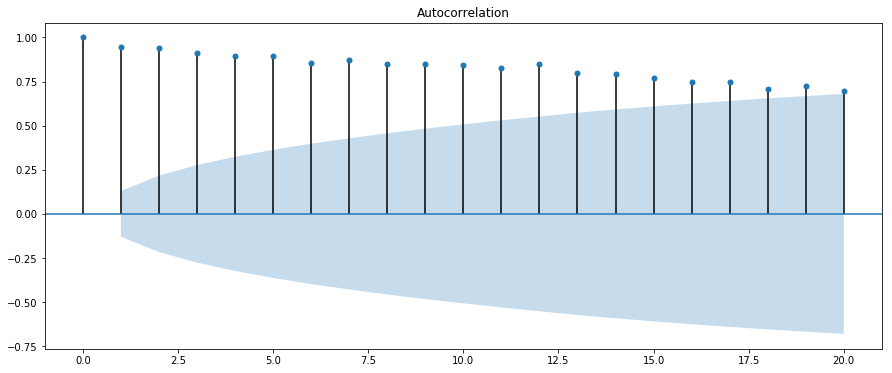

In [103]:
plot_acf(ts,lags=20)
plt.show()

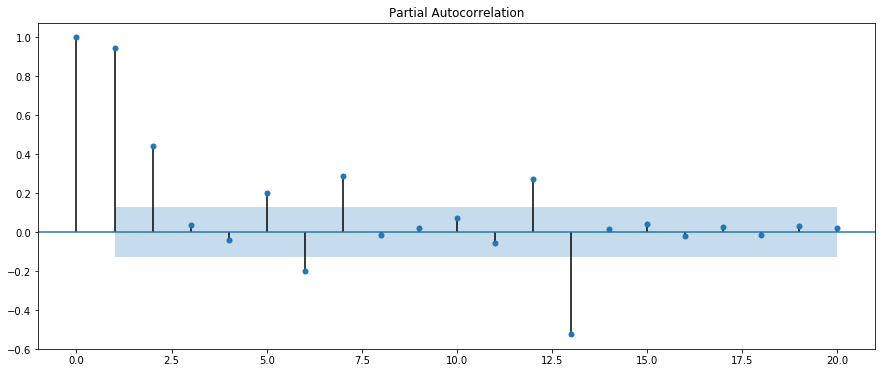

In [104]:
plot_pacf(ts,lags=20)
plt.show()

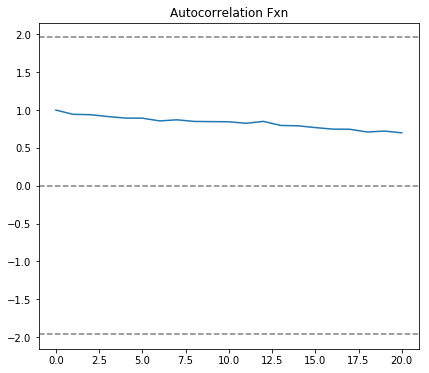

In [105]:
#The functino I coded before I found plot_acf * plot_pcf
#captures point to point trend, conneciting the dots
#does not seem to capture the variance trend
acfplt(ts)

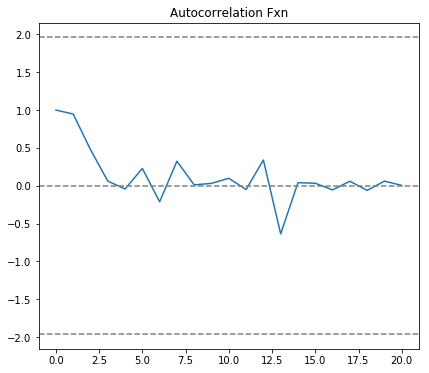

In [106]:
pacfplt(ts)

- ACFvalues at lags decays slowly. Indicates strong serial correlateion between ts vales
most likely from a trend
- Plotting a histogram provides information on the distribution of the values in the TS

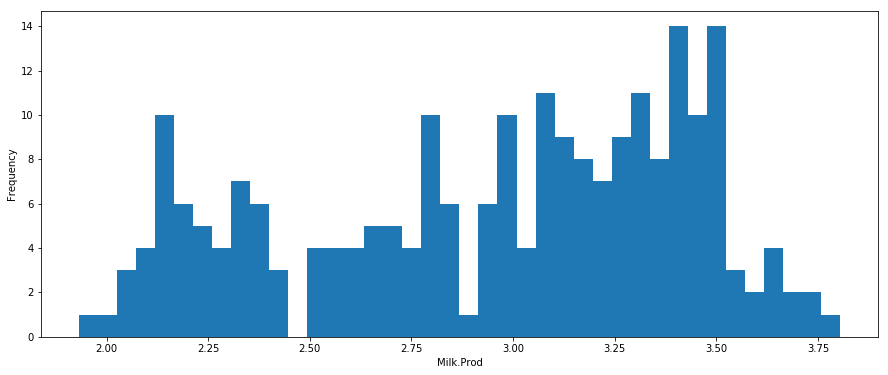

In [111]:
plt.hist(df['Milk.Prod'],bins=40,)
plt.xlabel('Milk.Prod')
plt.ylabel('Frequency')

plt.show()

- considerable dispersion, probably due to the trend

### Exercise: Plot Ice Cream Production


In this exercise you will use the **Icecream.Prod** column of the **diary** data frame. Create plots to answer the following questions. 

- Does icecream production have a noticable seasonal component? Can you characterize the trend of ice cream production greater over time as strong or weak? 
- Is the seasonal variation of icecream production noticable in the plot of ACF? Does the ACF plot indicate a strong trend component? 

Create new plots showing the ice cream production and answer the questions above.

***Answers:***
- Trend is weak over time. It appears relatively flat.
- Seasonaility is very strong
- The conf intv increases very slightly indicating slight positive trend.

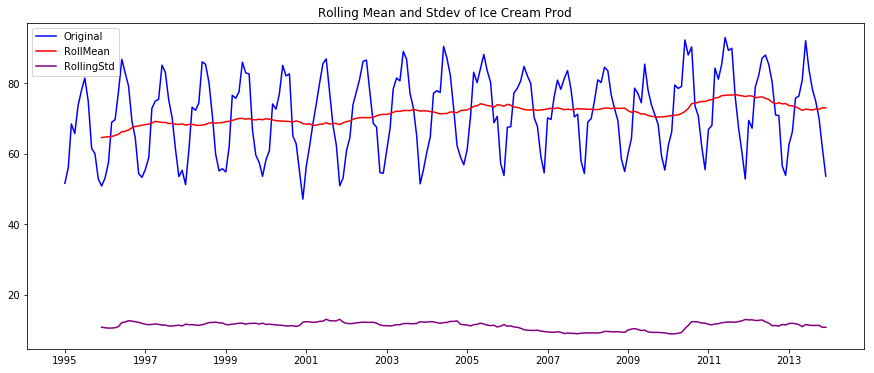

Dickey-Fuller Test: 
Test Statistic                  -2.509154
p-value                          0.113263
#Lags Used                      14.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


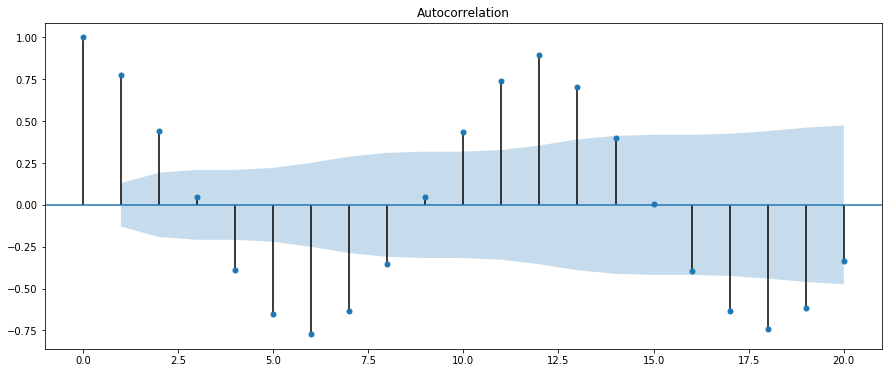

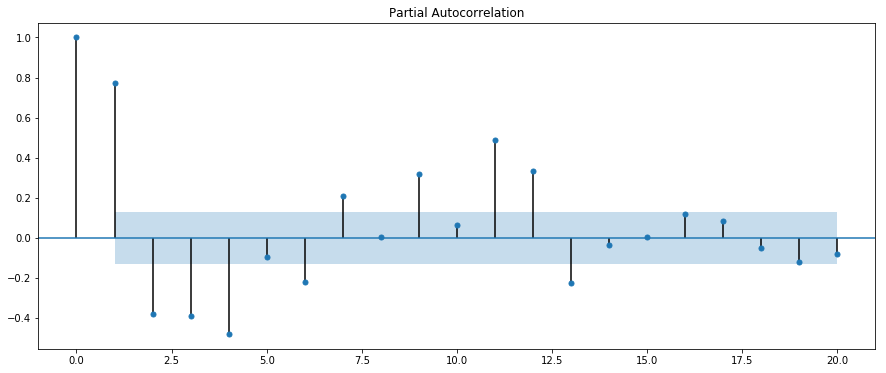

In [137]:


icecreamdf = df['Icecream.Prod']

test_stationary(icecreamdf,'Ice Cream Prod')

plot_acf(icecreamdf,lags=20)
plt.show()

plot_pacf(icecreamdf,lags=20)
plt.show()


## Simple Moving Average Decomposition of the Time Series

Time series are typically decomposed into three components: trend, seasonal, and the remainder, or residual. 
Trend can be modeled by several methods. 
You will start by decomposing the time series using a simple moving average model. 

In [124]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [203]:
def decomp_graphs(data,model):
    
    plt.close('all')
    
    s_model = seasonal_decompose(data,model=model)
    
    fig, ax = plt.subplots(4,1, sharex=True)
    fig.set_size_inches(16,16)

    ax[0].plot(s_model.seasonal, color='red')
    ax[0].set_title('Seasonal')

    ax[1].plot(s_model.trend, color='blue')
    ax[1].set_title('Trend')

    ax[2].plot(s_model.resid, color='green')
    ax[2].set_title('Residual')
    
    ax[3].plot(s_model.observed, color='black')
    ax[3].set_title('Observed')

    fig.subplots_adjust(hspace=0.3)
    plt.show()
    
    #returns 4 values
    return s_model

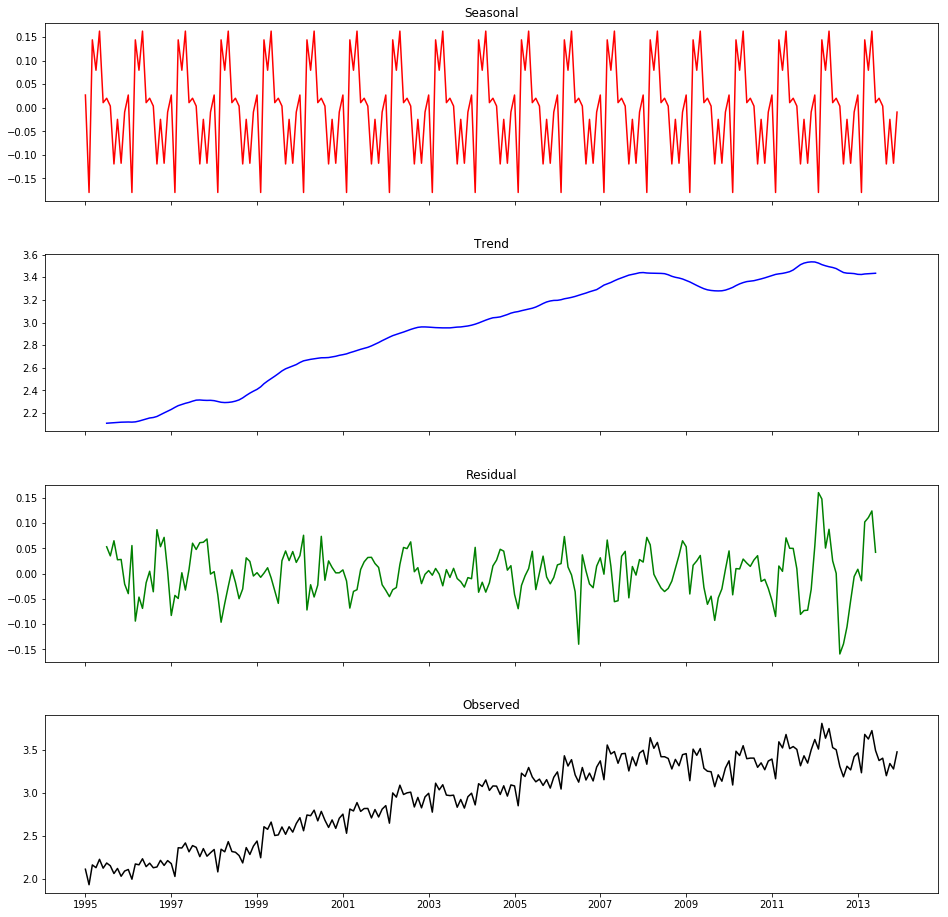

In [239]:
adddec = decomp_graphs(ts,'additive')

In [240]:
testdf = pd.DataFrame([adddec.observed,adddec.resid])

In [241]:
testdf.head()

,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,...,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00
Milk.Prod,2.112,1.932,2.162,2.13,2.227,2.124,2.18400,2.152000,2.062000,2.121000,...,3.676000,3.6220,3.720000,3.489000,3.373,3.4,3.197,3.338,3.275,3.473
Milk.Prod,NaN,NaN,NaN,NaN,NaN,NaN,0.05312,0.035155,0.065041,0.027444,...,0.102178,0.1109,0.124016,0.042236,NaN,NaN,NaN,NaN,NaN,NaN


***NOTE TO SELF:***
- The output from the seasonal decomp function has 4 parts. These parts can be put individually into dataframe series, making them easier to work with.
- ex:   pd.Series(season_output.trend)
- residuals will need a dropna to remove the NANs on the ends before it can be plotted

DO IT AGAIN WITH A MULTIPLICATIVE MODEL

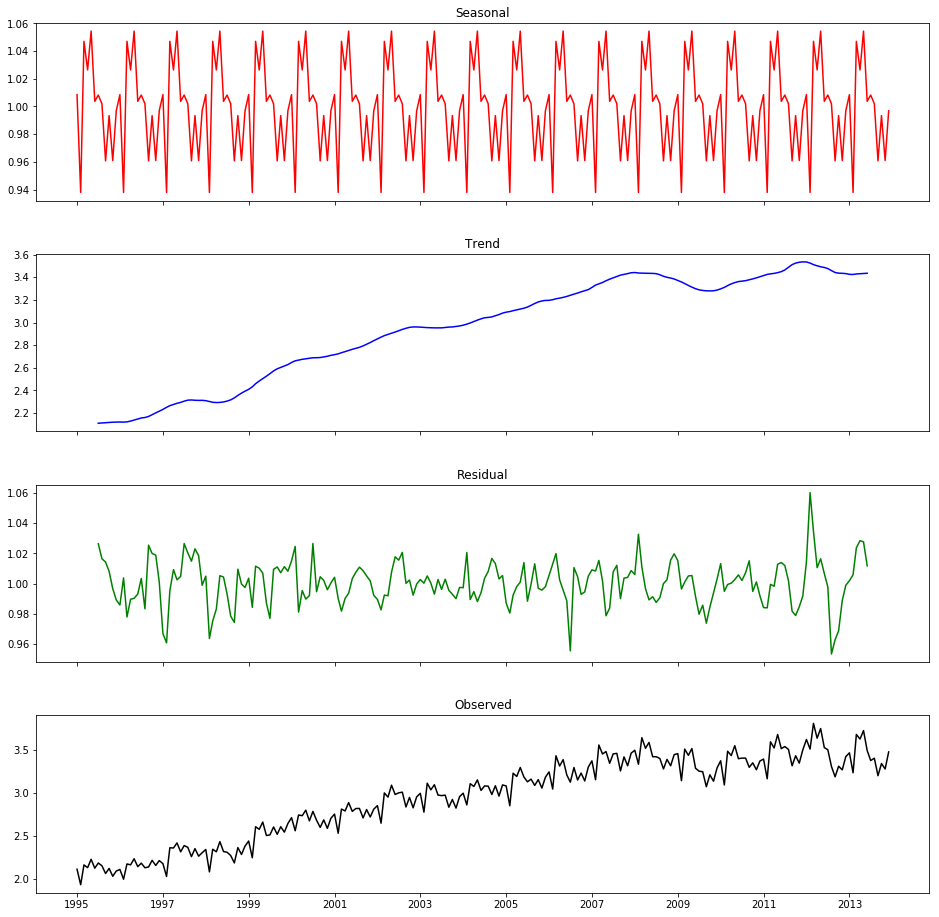

In [242]:
multdec = decomp_graphs(ts,'multiplicative')

In [248]:
tempdf = pd.Series(adddec.resid)
tempdf.head()

1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
Name: Milk.Prod, dtype: float64

In [249]:
tempdf.dropna(inplace=True)
tempdf.head()

1995-07-01    0.053120
1995-08-01    0.035155
1995-09-01    0.065041
1995-10-01    0.027444
1995-11-01    0.028062
Name: Milk.Prod, dtype: float64

In [631]:
def acf_of_decomp(adddec):
    plt.close('all')

    print('Seasonal')
    tempdf = pd.Series(adddec.seasonal)
    tempdf.dropna(inplace=True)
    plot_acf(tempdf,lags=20)
    plt.show()

    print('Trend')
    tempdf = pd.Series(adddec.trend)
    tempdf.dropna(inplace=True)
    plot_acf(tempdf,lags=20)
    plt.show()

    print('Residual')
    tempdf = pd.Series(adddec.resid)
    tempdf.dropna(inplace=True)
    plot_acf(tempdf,lags=20)
    plt.show()

    print('Observed')
    tempdf = pd.Series(adddec.observed)
    tempdf.dropna(inplace=True)
    plot_acf(tempdf,lags=20)
    plt.show()

ADDITIVE:

Seasonal


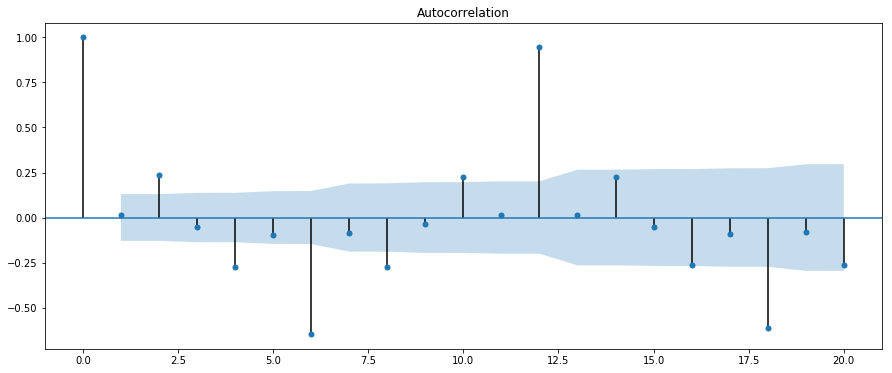

Trend


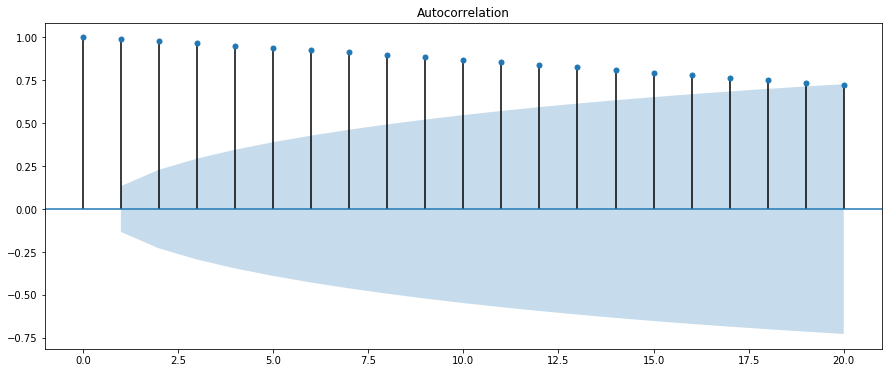

Residual


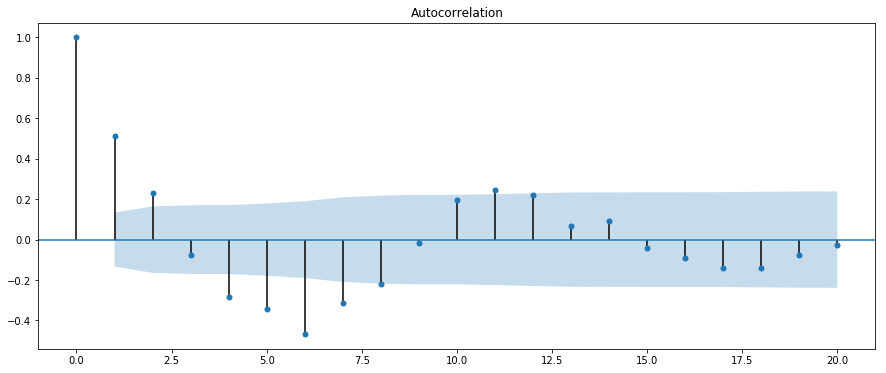

Observed


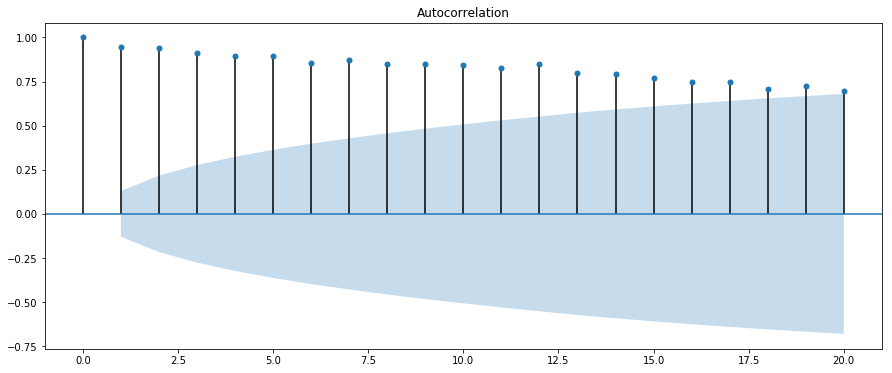

In [275]:

acf_of_decomp(adddec)



MULTIPLICATIVE:

Seasonal


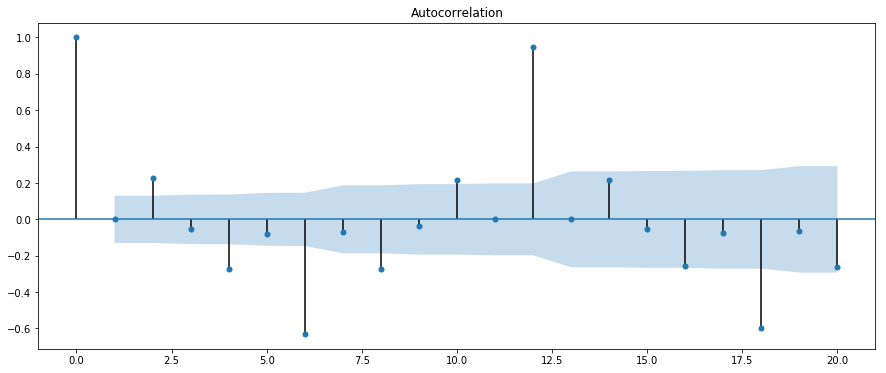

Trend


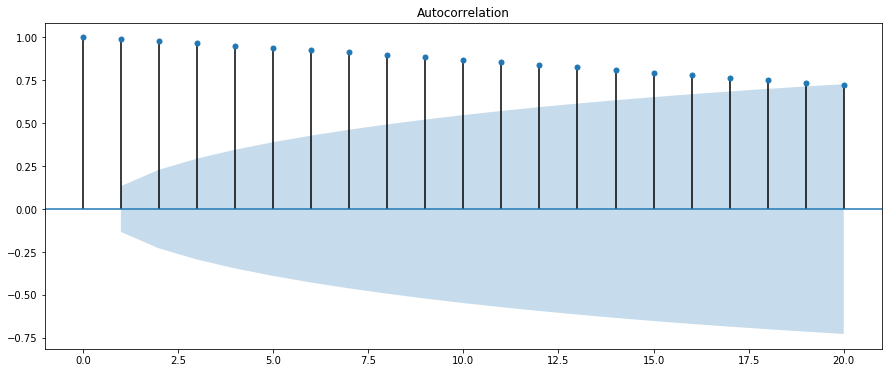

Residual


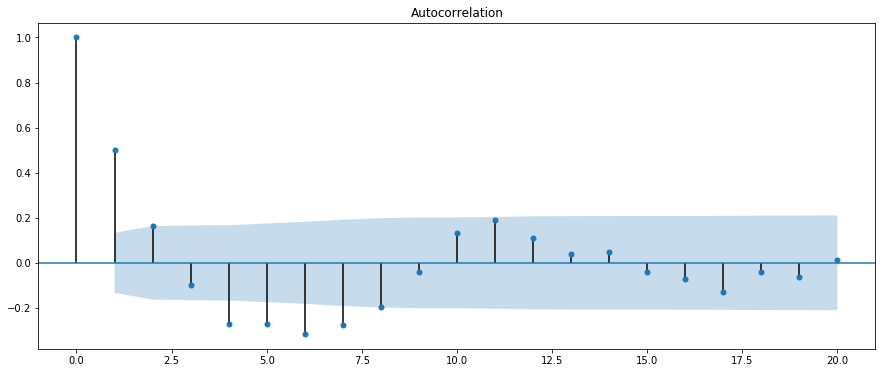

Observed


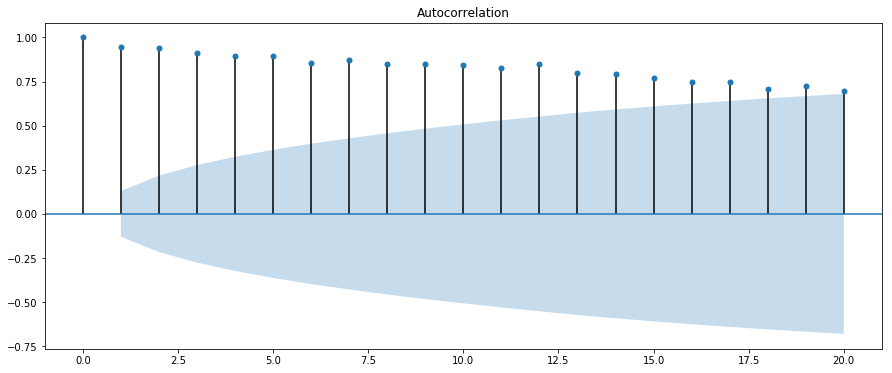

In [278]:
acf_of_decomp(multdec)

IN THE MULTIPLICATIVE PLOTS ABOVE
- ~Seven residuals are outside of the confidence interval, indicating their are significant


## Exploring the Multiplicative Model with lowess

Having tried a simple moving average decomposition, you will now use a lowess model to determine the trend. 

Lowess is a sophisticated non-linear regression. 

The lowess trend model is combined with a moving window seasonal component model into the R **stl** function.   

TODO:
- Decompose time series using seasonal trend loess (STL in R)
- Columns are added as new columns to input data frame
- Compute and view decomposition of milk production time series

NB - I had to go get a STL decomposition from the python website. Apparently the one I have been using from statsmodel is based on 
convolutional methods, a bit more sophisticated than doing it by hand.

In [280]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

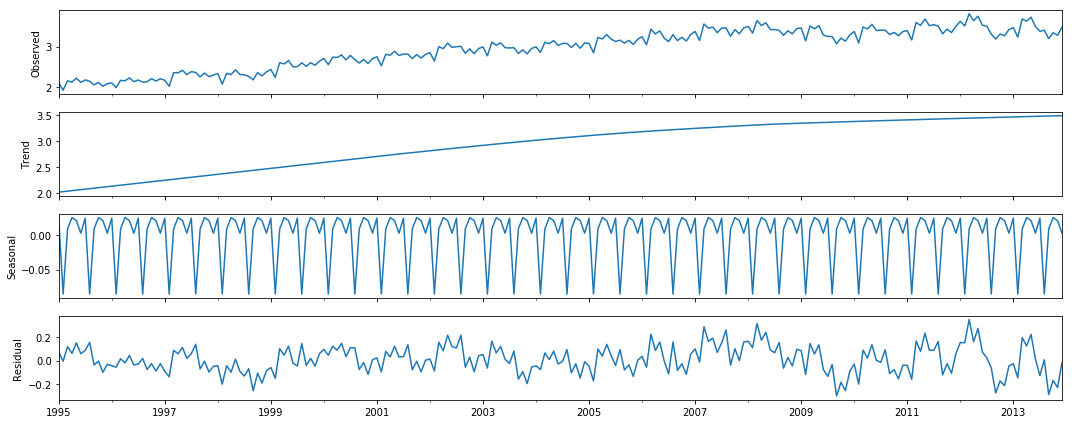

In [320]:
#default period was 365, but that was causing the seaosnal and the residual to die.
stl = decompose(ts,period=6)
#stl.seasonal.head()

stl.plot()
#Experiment with period: (going to go with 12)

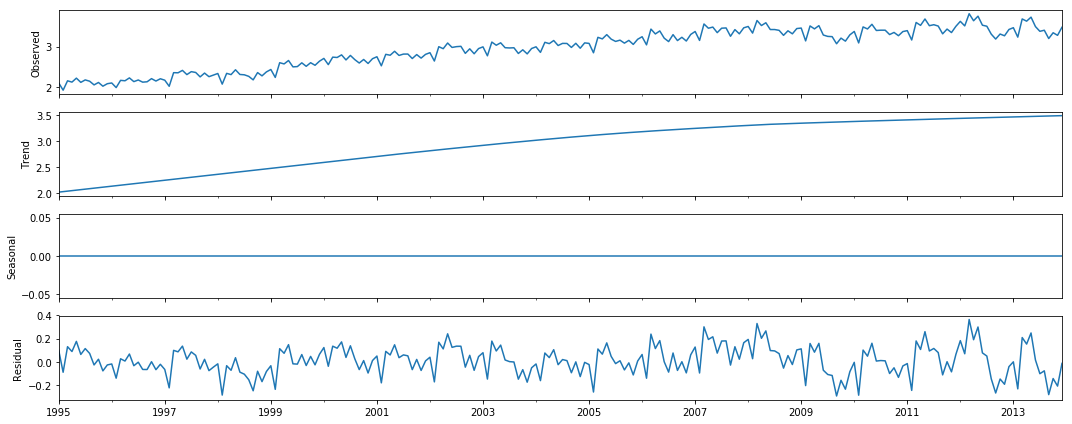

In [321]:
stl = decompose(ts,period=1)
stl.plot()

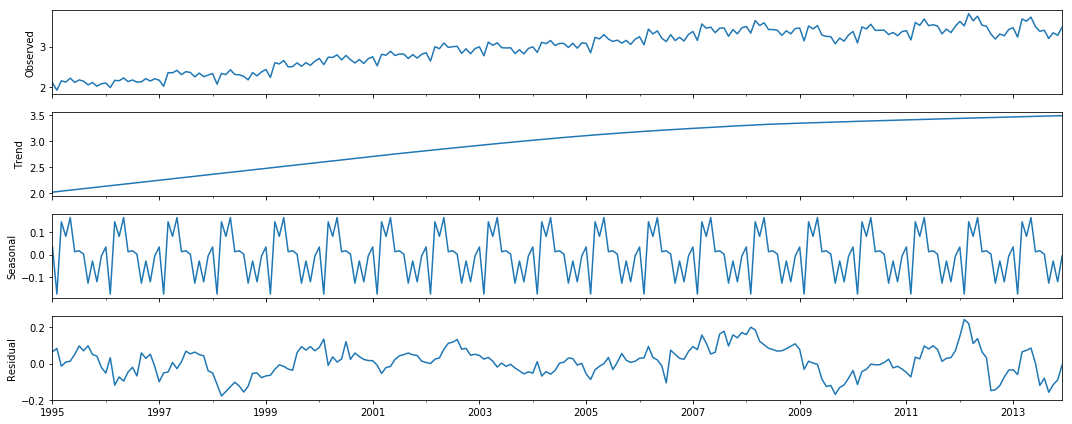

In [322]:
stl = decompose(ts,period=12)
stl.plot()

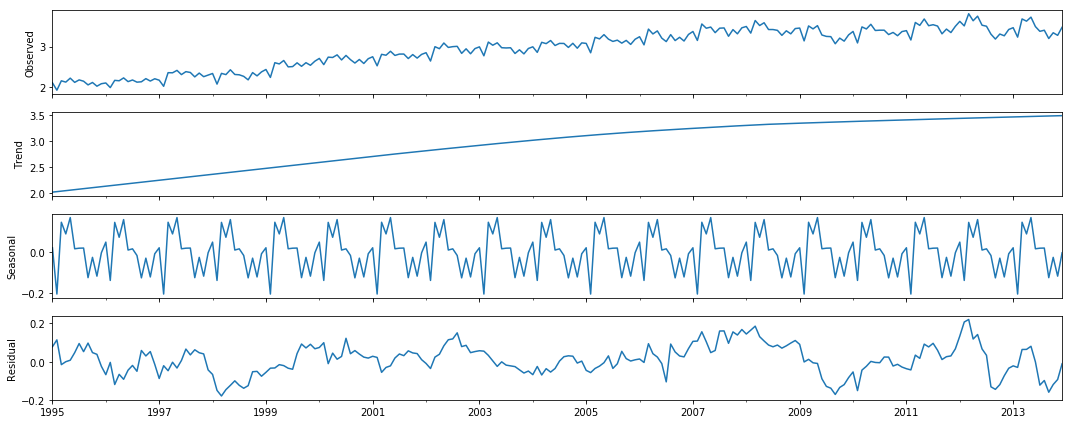

In [323]:
stl = decompose(ts,period=24)
stl.plot()

Seasonal


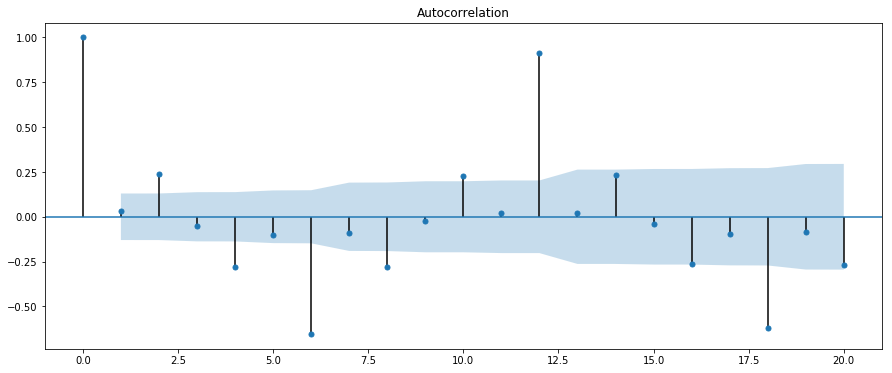

Trend


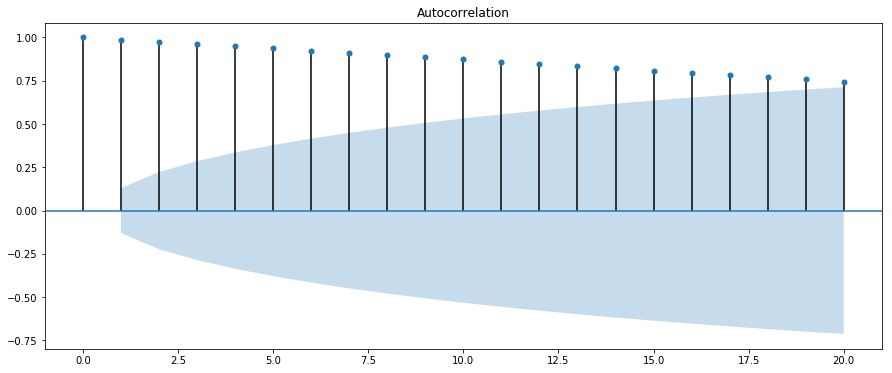

Residual


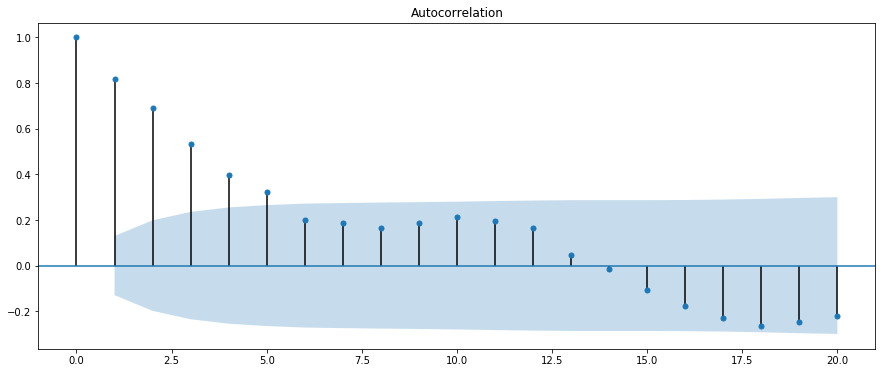

Observed


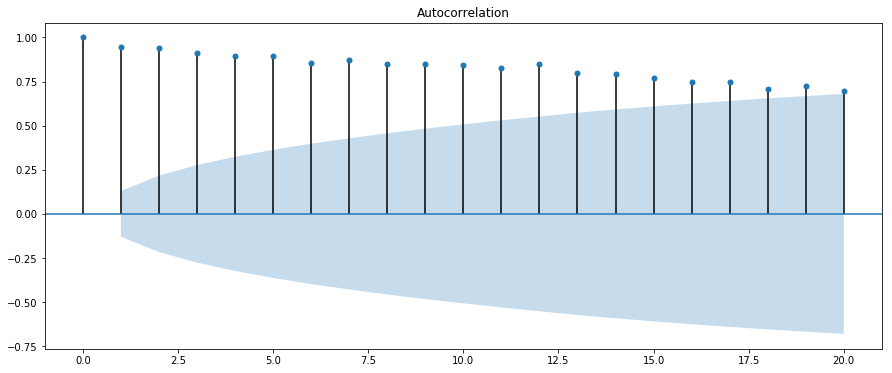

In [344]:
acf_of_decomp(stl)

- The first 4 or 5 lag values of the ACF have significant values
Improvement over the previous case but there is still a trend

TODO:
- Is the remainder stationary?

In [346]:
plt.close('all')

In [602]:
testdf = pd.Series(stl.resid)


In [603]:
testdf.head()

1995-01-01    0.078410
1995-02-01    0.114122
1995-03-01   -0.014967
1995-04-01    0.000284
1995-05-01    0.008135
Name: Milk.Prod, dtype: float64

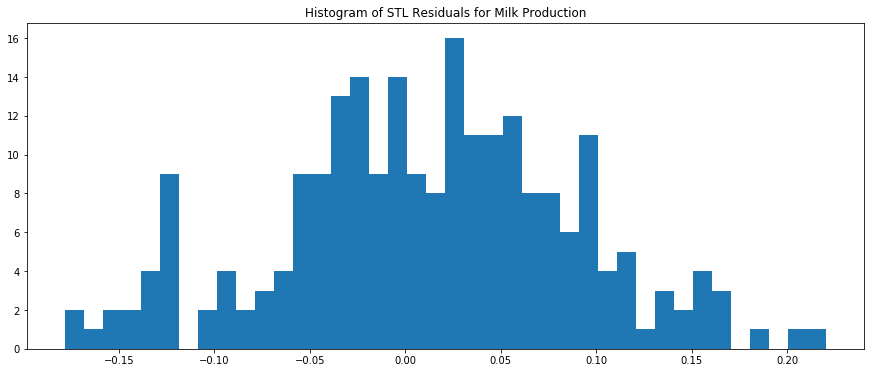

In [604]:
plt.hist(testdf,bins=40)
plt.title('Histogram of STL Residuals for Milk Production')

plt.show()


- This distribution is pretty close to normal (better than the last one)
- stl is mroe effectiive

TODO:
- investigate remained (non seasonal residual) by making a BOX PLOT by month of the year
- need to create box plot data

In [605]:
testdf = testdf.reset_index()
testdf.head()

,index,Milk.Prod
0,1995-01-01,0.078410
1,1995-02-01,0.114122
2,1995-03-01,-0.014967
3,1995-04-01,0.000284
4,1995-05-01,0.008135


In [606]:
import datetime

#create a month column from the date (index) column, manipulate it to month #s then drop the extras.
testdf['Month']=testdf['index']
testdf['Month'] = testdf['Month'].apply(lambda x: x.month)
testdf.drop('index',axis=1,inplace=True)
#testdf.head()

In [607]:

rng = testdf['Month'].unique()

mo = pd.DataFrame(np.zeros((19,12)))

for mnth in rng:

    #Picks the testdf rows for given month, independent of year
    #Once it has all of those, drop the Month column for easy Series based box plot understanding
    #use .values to return an array
    #slide it into the growing dataframe mo
    mo[mnth-1] = testdf[testdf['Month']==mnth].drop('Month',axis=1).values

#my matrix is transposed so the 19 rows come out on the bottom of the boxplot.
mo=mo.transpose()
mo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.078410,-0.067192,-0.087131,-0.065973,-0.055062,0.074378,0.028626,-0.008868,0.057484,-0.067177,-0.044810,0.014539,0.106416,0.144589,0.090626,-0.053062,-0.036242,0.134091,-0.021288
1,0.114122,-0.003304,-0.020475,-0.149052,-0.033291,0.099318,0.022658,-0.035208,0.055333,-0.024465,-0.056375,-0.003615,0.107744,0.164616,-0.000976,-0.150187,-0.042439,0.207225,-0.029271
2,-0.014967,-0.118528,-0.046620,-0.178243,-0.032321,-0.009854,-0.055110,0.024341,0.033382,-0.068865,-0.034739,0.094120,0.156272,0.185532,0.012623,-0.043424,0.034564,0.220248,0.063945
3,0.000284,-0.065587,-0.002412,-0.145253,-0.014991,0.045079,-0.029467,0.039124,0.004872,-0.035967,-0.022562,0.042191,0.104213,0.130741,-0.005375,-0.023460,0.017937,0.118458,0.064531
4,0.008135,-0.091312,-0.032603,-0.122929,-0.020062,0.013346,-0.021225,0.083240,-0.024037,-0.053736,-0.004785,0.024595,0.047755,0.108284,-0.008774,0.001838,0.091909,0.142001,0.080717


In [617]:
plt.close('all')
plt.title('Milk Production, Time Series Residuals for Each Month')
plt.xlabel('Month')
plt.ylabel('Residual')
plt.boxplot(mo)
plt.show()

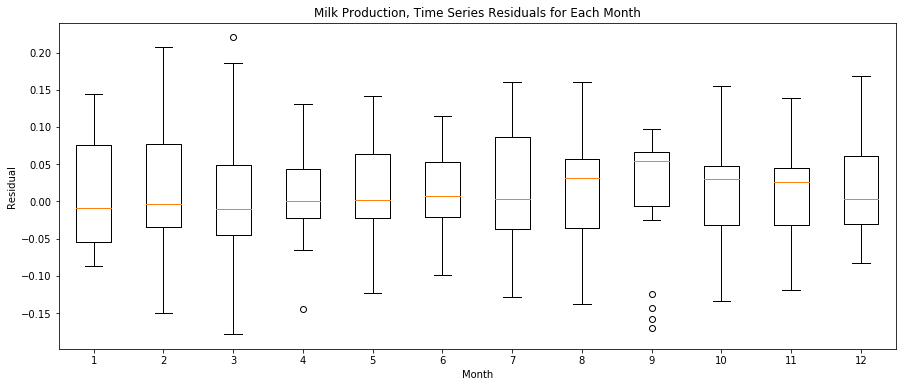

The remainder component shows only limited vairation from month to month. The differences are within the interquartile range, indicating that the seasonal model is a reasonably good fit.  
(did I do this right?)


### Exercise: Decomposition of Ice Cream Production Time Series

In this exercise you will decompose the **Icecream.Prod** column of the **diary** data frame. Create plots to answer the following questions. 

- Does icecream production have a noticable seasonal component or are the values all close to the average over time? Is there a strong seasonal component for icecream production. 
- Does the acf plot indicate that the remainder series is stationary?
- Do the values in the histogram have an approximately normal distribution?
- Does the interquartile range for each month overlap, indicating that the decomposition has produced a reasonably good model of the seasonal variation. 



TODO:
- acquire data
- take a look at the rolling mean, std devs, dickey-fuller statistics and patterns

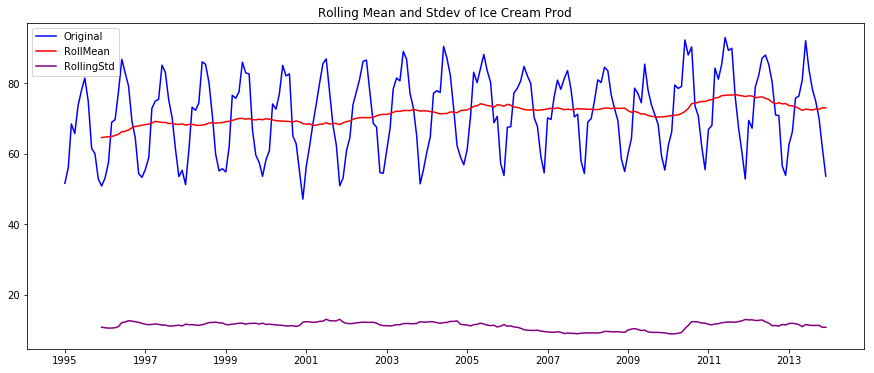

Dickey-Fuller Test: 
Test Statistic                  -2.509154
p-value                          0.113263
#Lags Used                      14.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


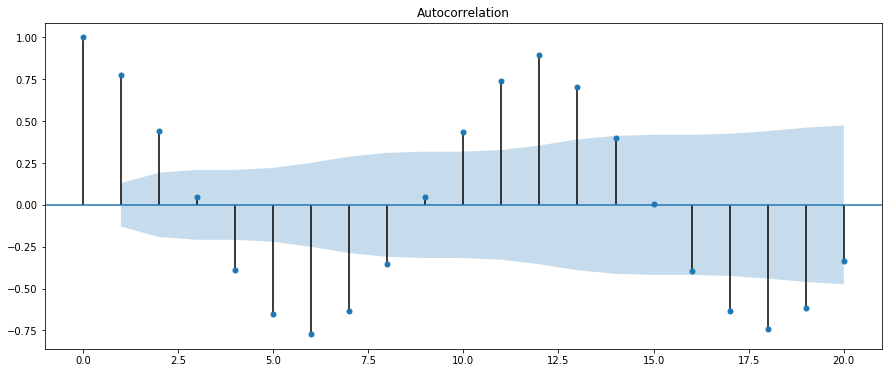

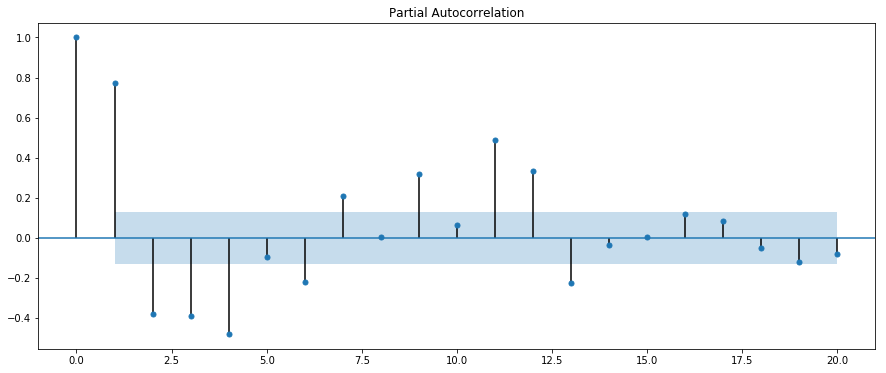

In [627]:
icp = df['Icecream.Prod']

test_stationary(icp,'Ice Cream Prod')

plot_acf(icp,lags=20)
plt.show()

plot_pacf(icp,lags=20)
plt.show()


- the DF Test Statisticis -2.5, which is still higher than the 10% critical value.
- component looks very seasonal
- slight increase in the autocorrelation

TODO:
- STL decomposition.

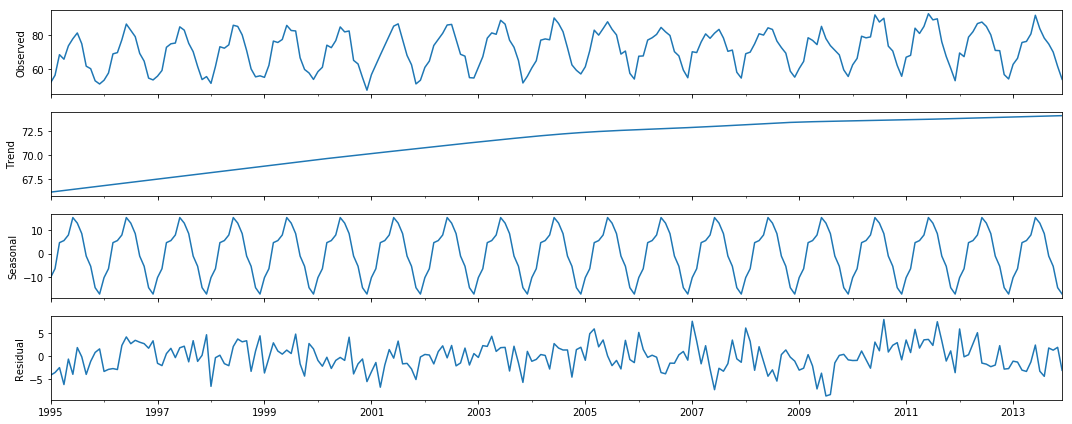

In [628]:
stl = decompose(icp,period=12)
stl.plot()

- The seasonal component is very, very strong
- the trend is much clearer this way
- the residuals are pretty chaotic

TODO:
- take the ACF of the decomposition residuals

Seasonal


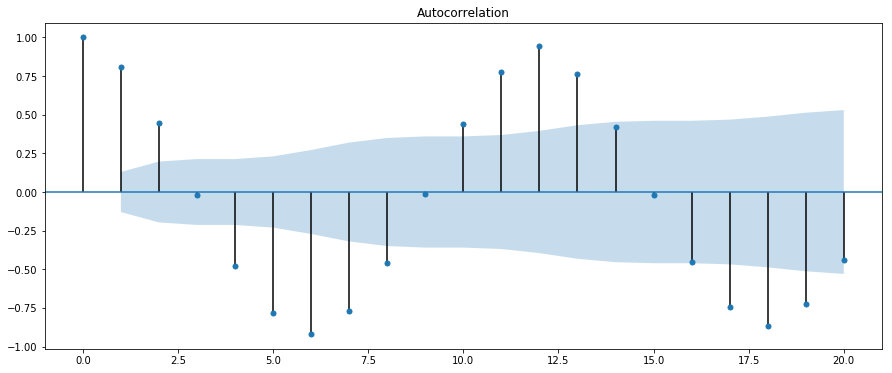

Trend


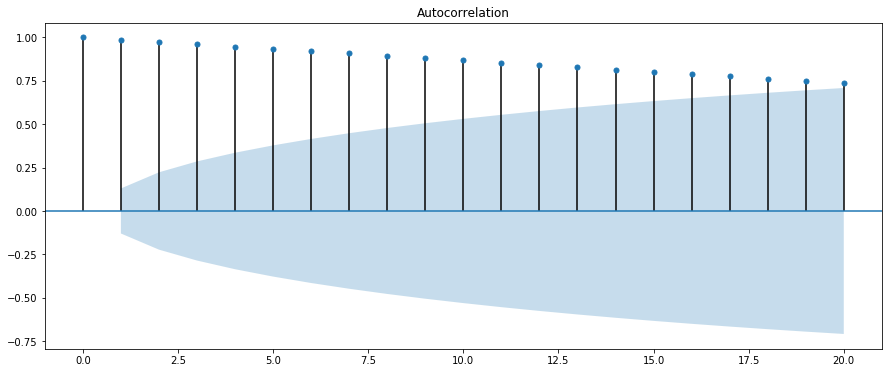

Residual


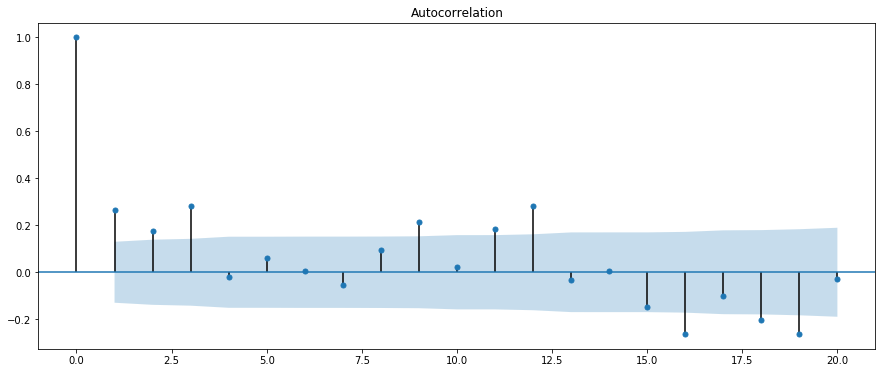

Observed


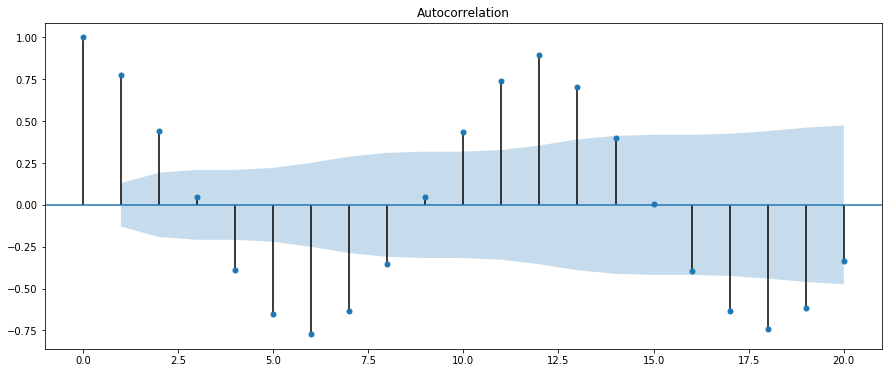

In [632]:
acf_of_decomp(stl)

From the ACF of the decomposition:
- seasonal trend oscillates
- trend definitely grows
- The residuals have many points that are statistically significant. 6-7 very clearly so.

TODO:
- Histogram and box plot of residuals

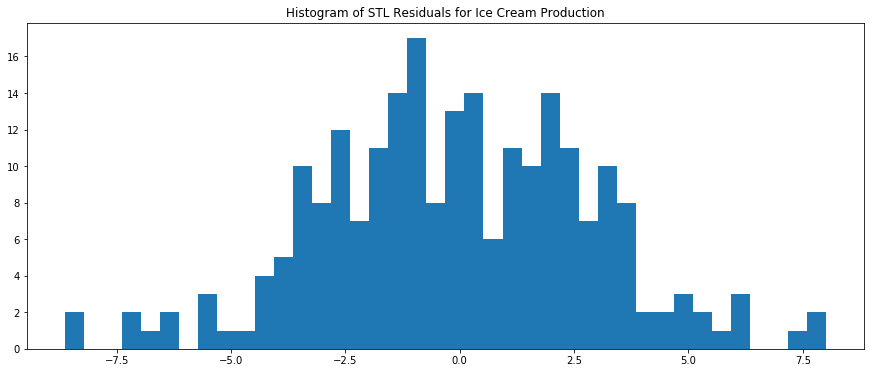

In [647]:
plt.close('all')
testdf = pd.Series(stl.resid)
plt.hist(testdf,bins=40)
plt.title('Histogram of STL Residuals for Ice Cream Production')
plt.show()

In [648]:
testdf = testdf.reset_index()

testdf['Month']=testdf['index']
testdf['Month'] = testdf['Month'].apply(lambda x: x.month)
testdf.drop('index',axis=1,inplace=True)




rng = testdf['Month'].unique()

mo = pd.DataFrame(np.zeros((19,12)))

for mnth in rng:

    #Picks the testdf rows for given month, independent of year
    #Once it has all of those, drop the Month column for easy Series based box plot understanding
    #use .values to return an array
    #slide it into the growing dataframe mo
    mo[mnth-1] = testdf[testdf['Month']==mnth].drop('Month',axis=1).values

#my matrix is transposed so the 19 rows come out on the bottom of the boxplot.
mo=mo.transpose()
#mo.head()

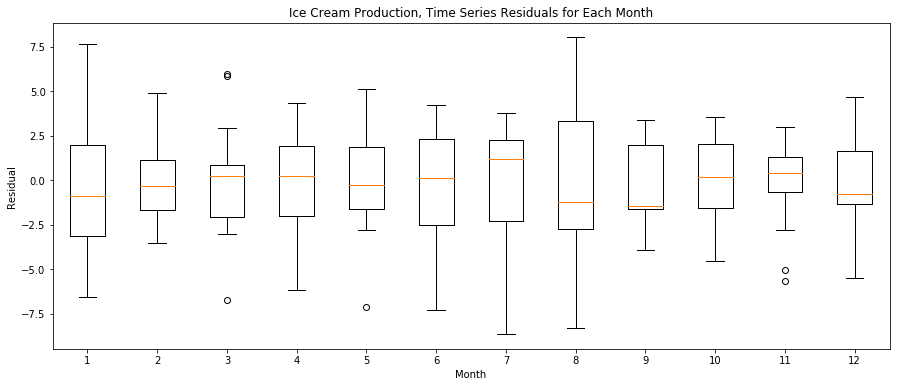

In [649]:
plt.close('all')
plt.title('Ice Cream Production, Time Series Residuals for Each Month')
plt.xlabel('Month')
plt.ylabel('Residual')
plt.boxplot(mo)
plt.show()

Questions from the Lab:

- Does icecream production have a noticable seasonal component or are the values all close to the average over time? Is there a strong seasonal component for icecream production. 

ANS: Very noticeqable seasonal component. 

- Does the acf plot indicate that the remainder series is stationary?

ANS: the acf plot indicates the remainder is either stationary or very, very slightly increasing

- Do the values in the histogram have an approximately normal distribution?

ANS: the histogram indicates a normalish distribution.

- Does the interquartile range for each month overlap, indicating that the decomposition has produced a reasonably good model of the seasonal variation. 

ANS: The IQRs do overlap though the medians diverge a bit.

## Moving Average Models

Now that you have explored the decomposition of the time series you, will now construct and test Autoregressive Moving Average (ARMA) models for the remainder of the time series. You will create and test these models in three steps, creating a moving average (MA) model, creating an autoregressive (AR) model and creating an autoregressive moving average (ARMA) model. 

The function in the cell below computes an Autoregressive Integrative Moving Average (ARIMA) model. The summary statistics for the model are printed and the model object returned. By assigning values to the order of each operator different time series models can be specified, as order of MA model, order of Integrative model, and order of AR model. Since the de-trended remainder is being modeled, the **include.mean** argument is set to FALSE in the **arima** function. 

The ACF of the remainder from the **stl** decomposition of the milk production time series had 4 significant lag values. As an inital model, you will now create an MA model of order 4. Execute the code in the cell below to compute the MA(4) model and examine the model summary. 

***Note:*** My ACF of the remaindeer fo the STL/MilkProd had 5 significant lag values.

TODO:
- grab milk prod data again
- import and try out the arima model
- plot ACR of the residuals

In [707]:
mam = df['Milk.Prod']
stl = decompose(mam,period=12)

#mam.head()

date = stl.resid

In [670]:
from statsmodels.tsa.arima_model import ARIMA

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(0, 5)   Log Likelihood                 385.197
Method:                       css-mle   S.D. of innovations              0.045
Date:                Sun, 07 Jan 2018   AIC                           -756.395
Time:                        19:41:36   BIC                           -732.390
Sample:                    01-01-1995   HQIC                          -746.709
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0129      0.011      1.204      0.230      -0.008       0.034
ma.L1.Milk.Prod     0.7625      0.067     11.428      0.000       0.632       0.893
ma.L2.Milk.Prod     0.7043      

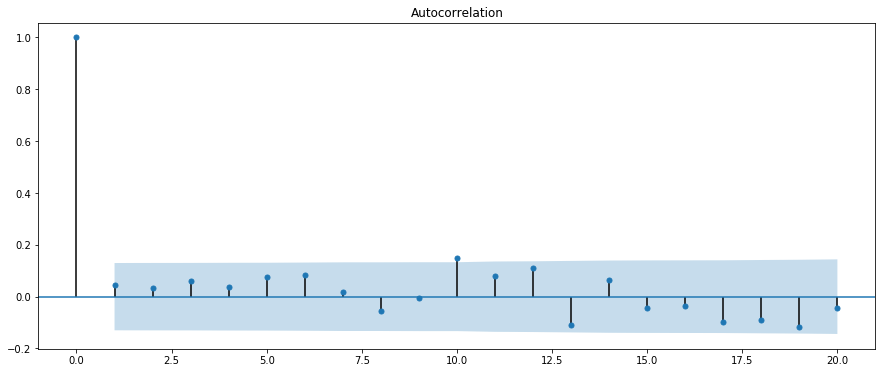

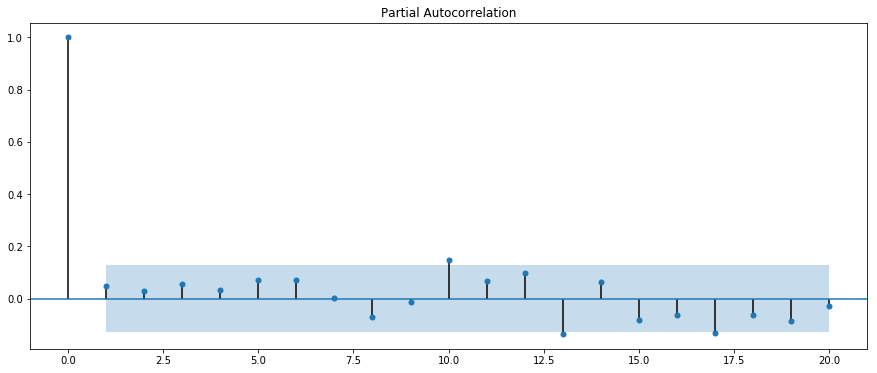

In [708]:
mam = df['Milk.Prod']
stl = decompose(mam,period=12)

#mam.head()

date = stl.resid

model = ARIMA(date,order=(0,0,5),freq='M')
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()


- Examine Values of Model Coefficients: all are greater than standard error (else they are poorly determined and should be set to 0)
- Order of MA model is to be reduced in unit steps until all the coefficients appear to be significant 
- They already look that way to me, so I will use an MA(5), ,but first...

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(0, 4)   Log Likelihood                 371.866
Method:                       css-mle   S.D. of innovations              0.047
Date:                Sun, 07 Jan 2018   AIC                           -731.732
Time:                        19:43:44   BIC                           -711.156
Sample:                    01-01-1995   HQIC                          -723.430
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0123      0.009      1.330      0.185      -0.006       0.030
ma.L1.Milk.Prod     0.7858      0.072     10.856      0.000       0.644       0.928
ma.L2.Milk.Prod     0.6744      

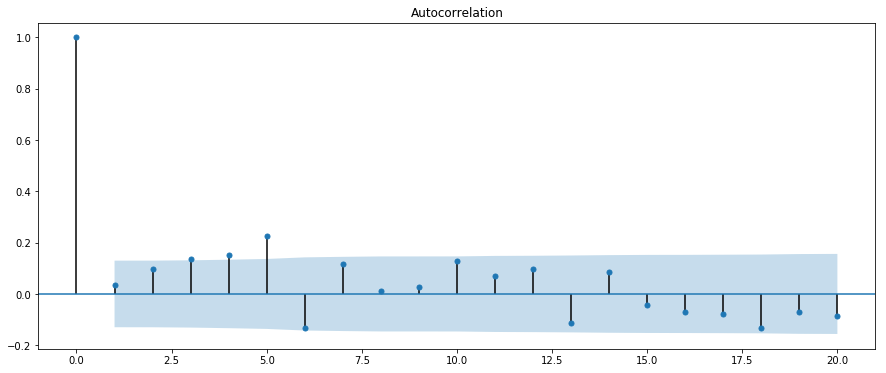

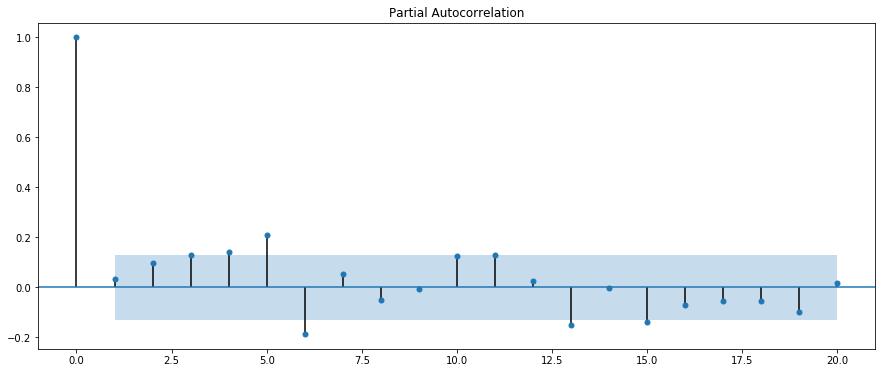

In [713]:

model = ARIMA(date,order=(0,0,4),freq='M')
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(0, 3)   Log Likelihood                 370.654
Method:                       css-mle   S.D. of innovations              0.048
Date:                Sun, 07 Jan 2018   AIC                           -731.308
Time:                        19:45:03   BIC                           -714.161
Sample:                    01-01-1995   HQIC                          -724.389
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0122      0.009      1.396      0.164      -0.005       0.029
ma.L1.Milk.Prod     0.8065      0.067     11.987      0.000       0.675       0.938
ma.L2.Milk.Prod     0.6281      

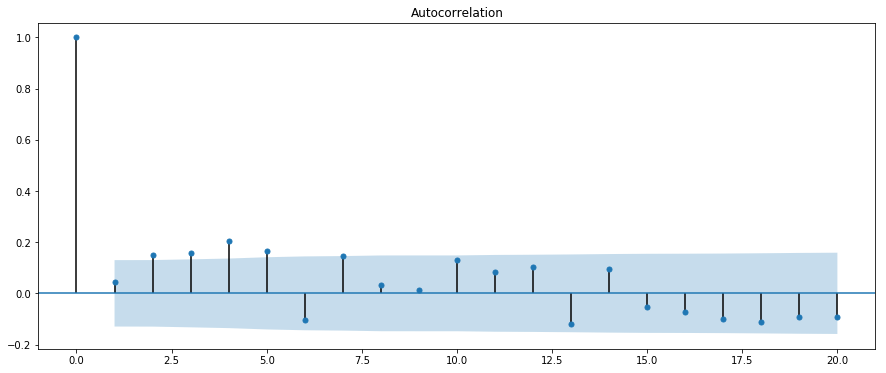

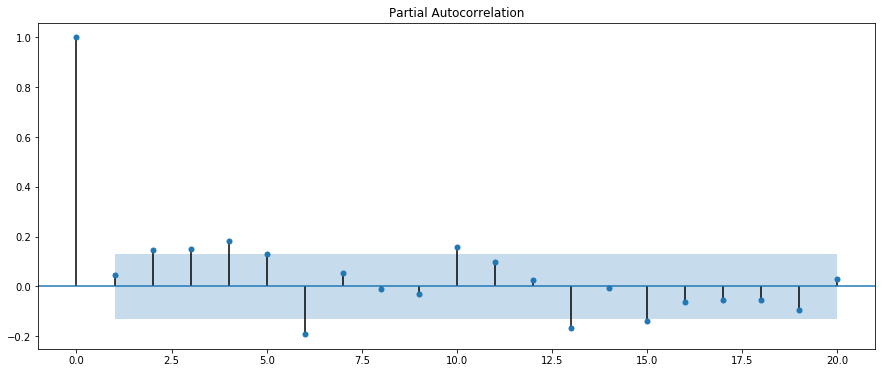

In [714]:
model = ARIMA(date,order=(0,0,3),freq='M')
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

## Autoregressive Models

- The PACF of the remainder indicates that an AR model might not be the best choice
- low AR model might help

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(2, 0)   Log Likelihood                 378.495
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sun, 07 Jan 2018   AIC                           -748.990
Time:                        19:41:56   BIC                           -735.272
Sample:                    01-01-1995   HQIC                          -743.455
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0123      0.016      0.745      0.457      -0.020       0.045
ar.L1.Milk.Prod     0.7469      0.066     11.302      0.000       0.617       0.876
ar.L2.Milk.Prod     0.0725      

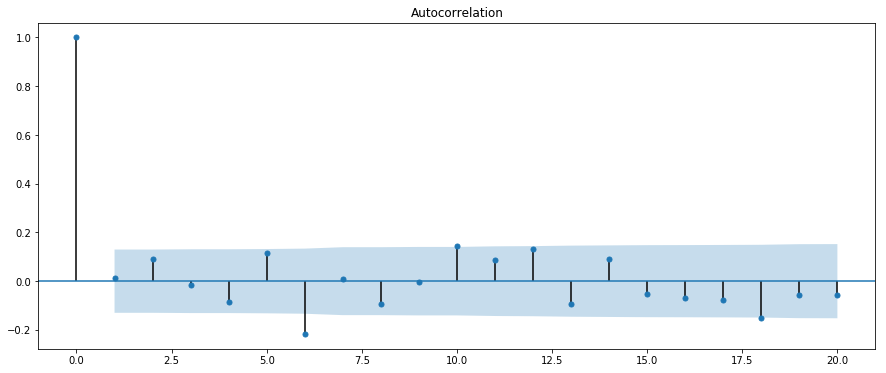

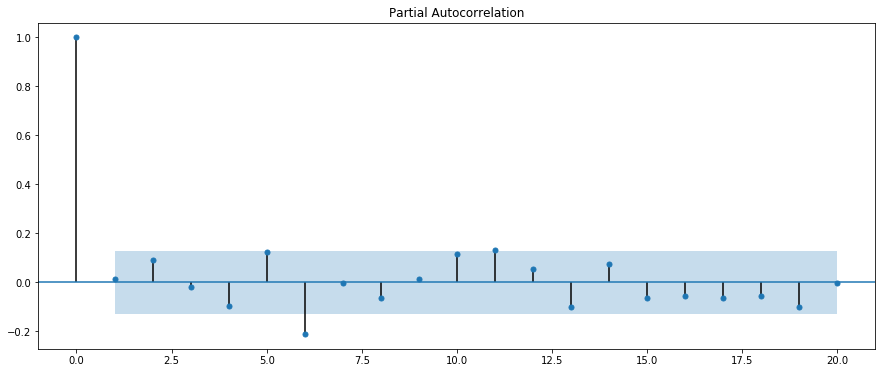

In [709]:
model = ARIMA(date,order=(2,0,0))
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

- Some signficance, zero and...6... 12? and 18
- There are signficiant lags at 0 for both. May want to check this against something. That 0 may be an artifact.

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(1, 0)   Log Likelihood                 377.901
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sun, 07 Jan 2018   AIC                           -749.802
Time:                        19:45:29   BIC                           -739.514
Sample:                    01-01-1995   HQIC                          -745.651
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0123      0.015      0.798      0.426      -0.018       0.042
ar.L1.Milk.Prod     0.8055      0.039     20.829      0.000       0.730       0.881
                                

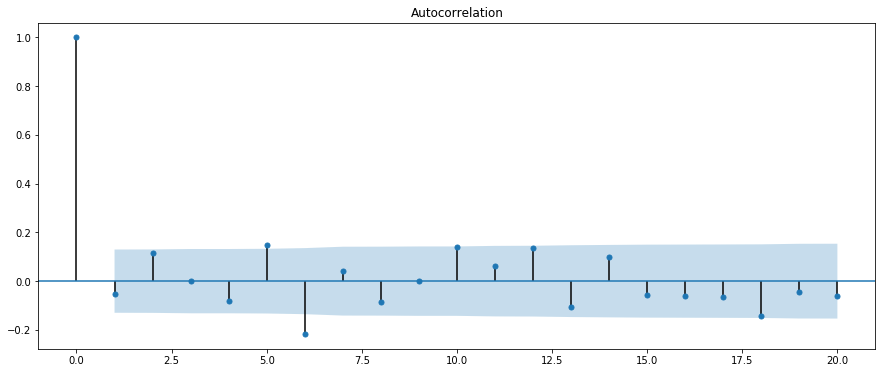

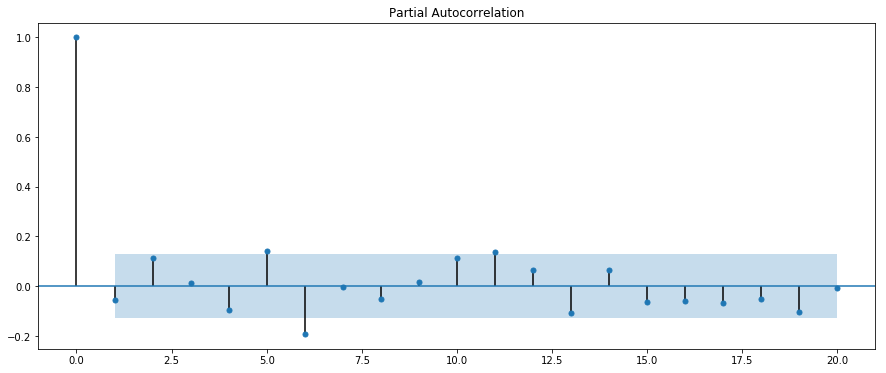

In [715]:
model = ARIMA(date,order=(1,0,0))
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

## General question: Why am I seeing spikes every 6 units?
Because seasonal that's not decomposed. Need to be using the residuals for this, not hte original dataset.

## ARMA(1,3)

TODO: ARMA of the values we farmed above
- Result: SE ~ O(Coef) ... bad model

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(1, 3)   Log Likelihood                 380.468
Method:                       css-mle   S.D. of innovations              0.045
Date:                Sun, 07 Jan 2018   AIC                           -748.936
Time:                        19:56:14   BIC                           -728.360
Sample:                    01-01-1995   HQIC                          -740.634
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0126      0.015      0.835      0.405      -0.017       0.042
ar.L1.Milk.Prod     0.7881      0.076     10.344      0.000       0.639       0.937
ma.L1.Milk.Prod    -0.0328      

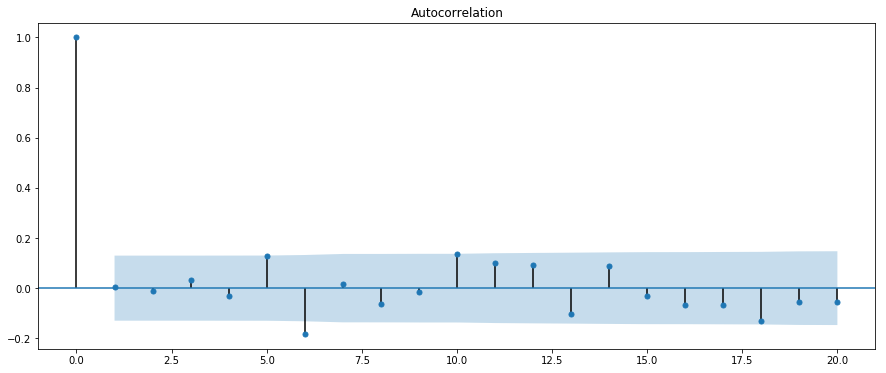

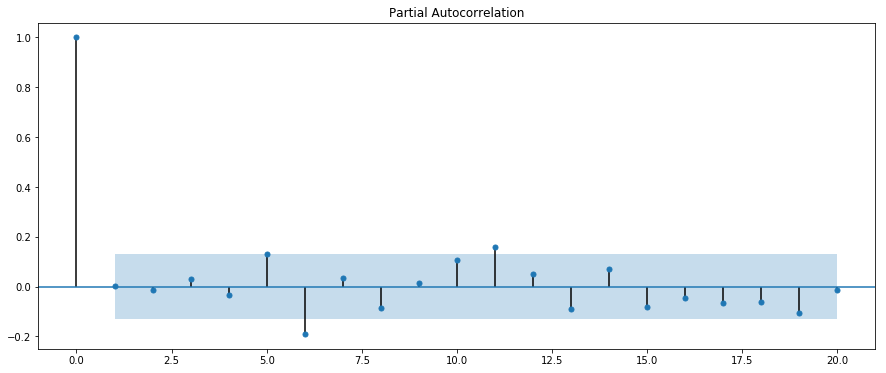

In [717]:

model = ARIMA(date,order=(1,0,3))
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

TODO: 
- ARMA(1,1)
- Answer these questions
- How do the standard errors compare to the values of the coefficients?

Ar L1 coeff is bigger than std er, ma L1 is not

- Do you think this model fits the data well or is it over parameterize?

Over parameterized

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(1, 1)   Log Likelihood                 378.356
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sun, 07 Jan 2018   AIC                           -748.713
Time:                        19:57:44   BIC                           -734.995
Sample:                    01-01-1995   HQIC                          -743.178
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0123      0.016      0.753      0.452      -0.020       0.044
ar.L1.Milk.Prod     0.8296      0.043     19.139      0.000       0.745       0.915
ma.L1.Milk.Prod    -0.0689      

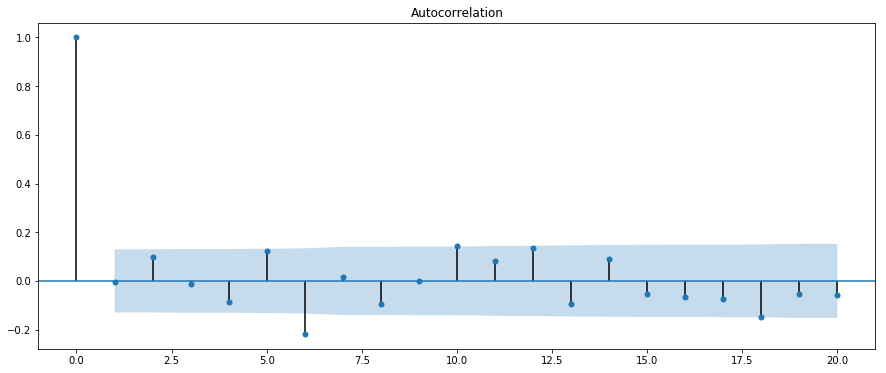

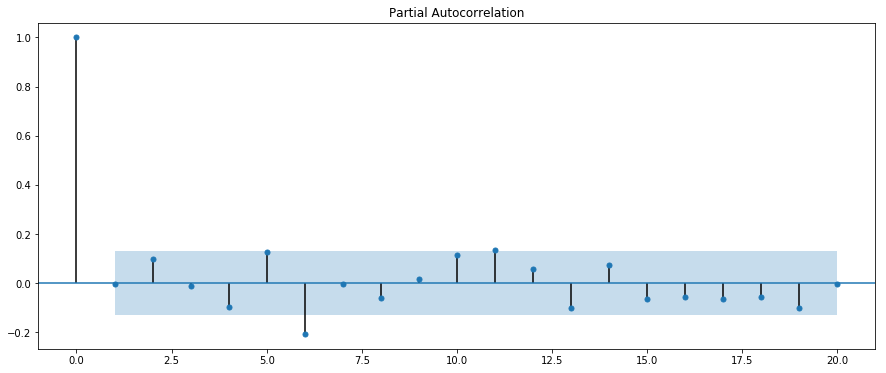

In [720]:

model = ARIMA(date,order=(1,0,1))
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

## Exploring the Difference Series

Using a difference series is a method to remove trend from a time series. The difference can be computed for any number of lag values, depending on the order of the trend.  In this case you will use a first order difference series to model the trend in the milk production time series. 

Using the code in the cell below, you will compute the first order difference series. Notice that the difference series is  necessarily of length one less than the original series. Execute the code in the cell to compute the difference series. 

TODO:
- Make difference series function (that's built into np and pd)
- compute STL of the difference series

In [758]:
Diff = mam.diff()

In [759]:
Diff.head()

1995-01-01      NaN
1995-02-01   -0.180
1995-03-01    0.230
1995-04-01   -0.032
1995-05-01    0.097
Name: Milk.Prod, dtype: float64

In [760]:
Diff.dropna(inplace=True)

In [761]:
#test_stationary(Diff,'Delta Milk Prod')

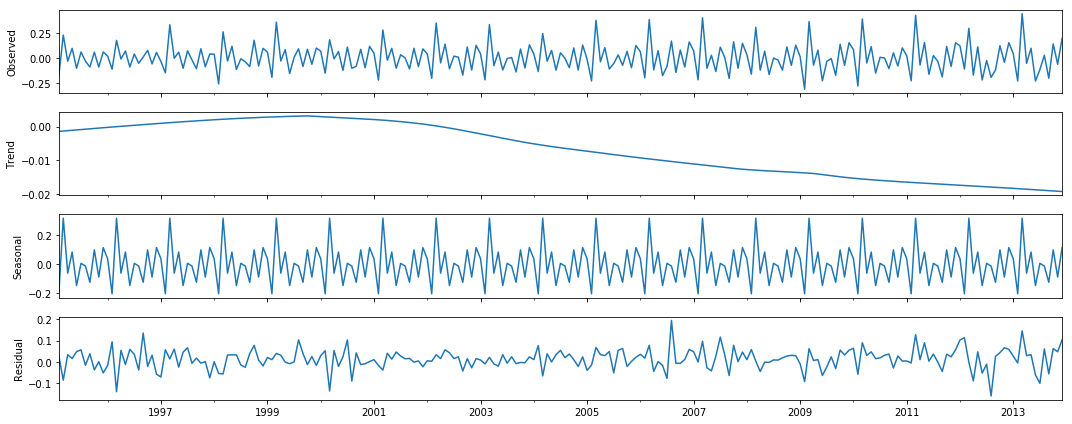

In [762]:
stl = decompose(Diff,period=12,lo_frac=0.5)
stl.plot()

#date = stl.resid

Seasonal


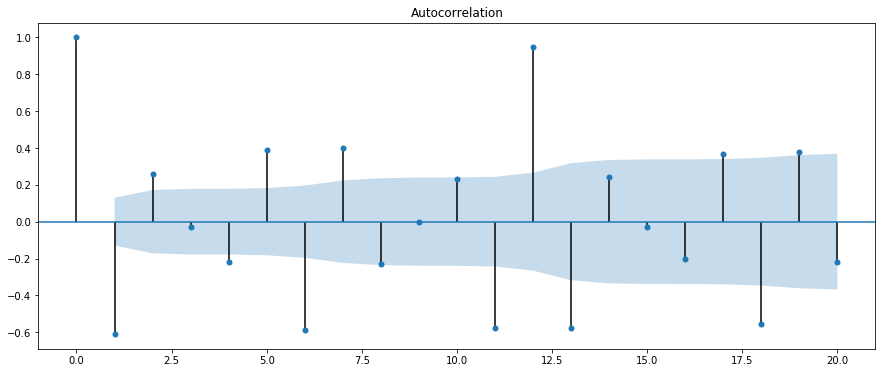

Trend


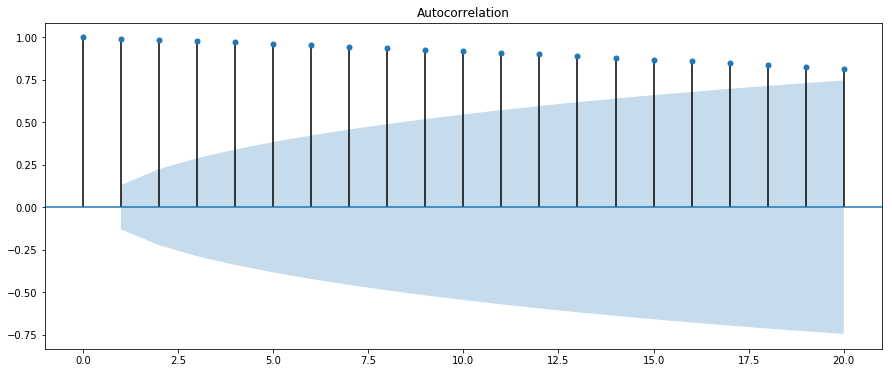

Residual


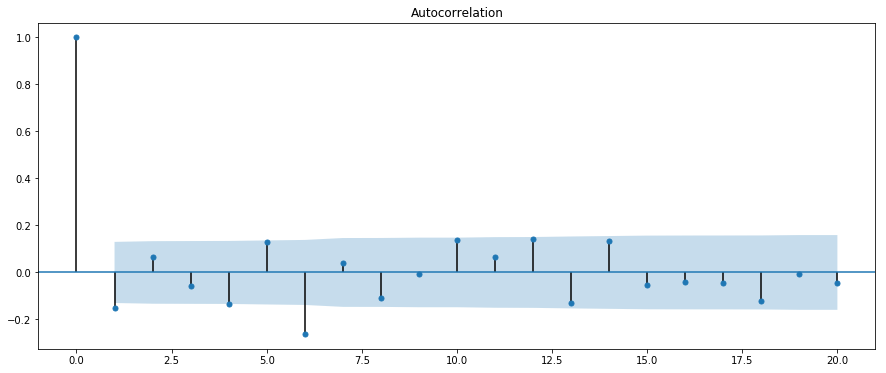

Observed


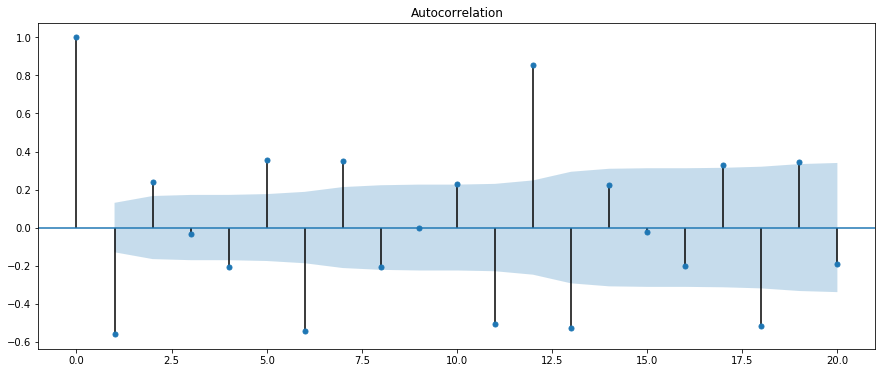

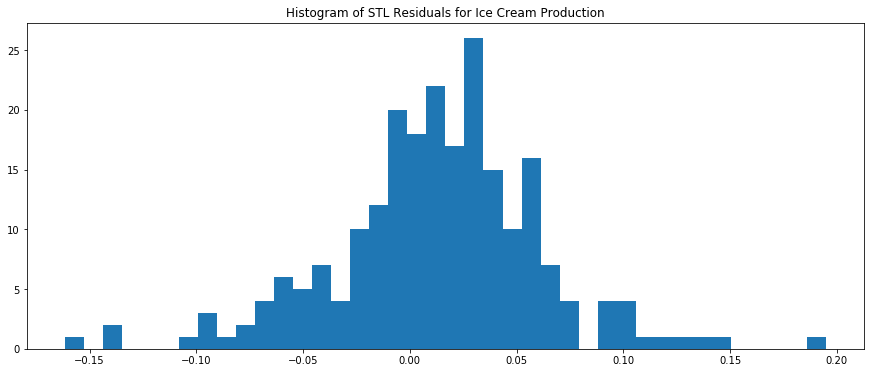

In [766]:

acf_of_decomp(stl)

plt.close('all')

testdf = pd.Series(stl.resid)


plt.hist(testdf,bins=40)
plt.title('Histogram of STL Residuals for Ice Cream Production')
plt.show()
testdf = testdf.reset_index()

testdf['Month']=testdf['index']
testdf['Month'] = testdf['Month'].apply(lambda x: x.month)
testdf.drop('index',axis=1,inplace=True)


In [767]:
testdf.head()

,Milk.Prod,Month
0,0.028186,2
1,-0.086737,3
2,0.033235,4
3,0.015098,5
4,0.047804,6


In [803]:
##Bruteforced for now.

Jan = testdf[testdf['Month']==1].drop('Month',axis=1).values
Feb = testdf[testdf['Month']==2].drop('Month',axis=1).values
Mar = testdf[testdf['Month']==3].drop('Month',axis=1).values
Apr = testdf[testdf['Month']==4].drop('Month',axis=1).values
May = testdf[testdf['Month']==5].drop('Month',axis=1).values
Jun = testdf[testdf['Month']==6].drop('Month',axis=1).values
Jul = testdf[testdf['Month']==7].drop('Month',axis=1).values
Aug = testdf[testdf['Month']==8].drop('Month',axis=1).values
Sep = testdf[testdf['Month']==9].drop('Month',axis=1).values
Oct = testdf[testdf['Month']==10].drop('Month',axis=1).values
Nov = testdf[testdf['Month']==11].drop('Month',axis=1).values
Dec = testdf[testdf['Month']==12].drop('Month',axis=1).values

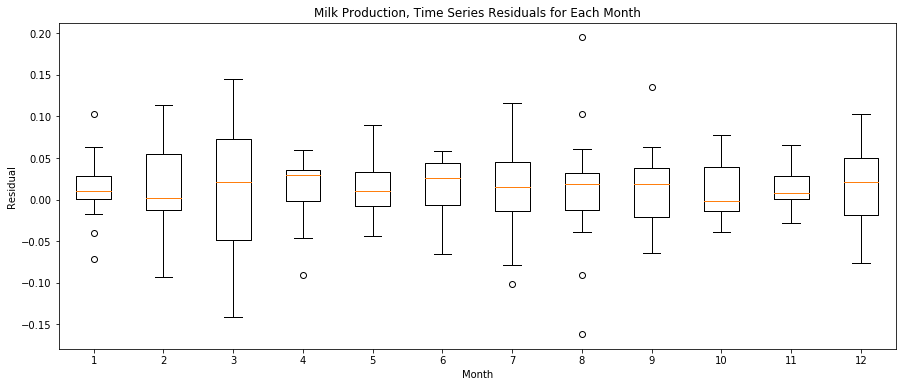

In [806]:
plt.close('all')
plt.title('Milk Production, Time Series Residuals for Each Month')
plt.xlabel('Month')
plt.ylabel('Residual')
plt.boxplot((Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec))
plt.show()


- Does the acf plot indicate that the remainder series is stationary?  

ANS: Not, the ACF plot indicates the remainder series is slightly non-stationary. Slightly.

- Is the dispersion of these values greater or less than the dispersion obtained directly from the decomposition of the time series (without diferencing). 

Dispersion seems to be less.

- Is the interquartile range of these values greater or less than the interquartile range obtained directly from the decomposition of the time series (without differencing). 

IQR are noticeable tighter.


## Autoregressive Integrative Moving Average Model

It is clear from the exploration of the ARMA model, that the remainder of the decomposition of the dairy production time series is not stationary. You will now model the remainder series with an autoregressive integrative moving average (ARIMA) model.

Execute the code in the cell below to compute an ARIMA(1,1,1) model.

                             ARIMA Model Results                              
Dep. Variable:            D.Milk.Prod   No. Observations:                  227
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 368.137
Method:                       css-mle   S.D. of innovations              0.048
Date:                Sun, 07 Jan 2018   AIC                           -728.275
Time:                        20:57:50   BIC                           -714.575
Sample:                    02-01-1995   HQIC                          -722.747
                         - 12-01-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004      0.003     -0.137      0.891      -0.006       0.005
ar.L1.D.Milk.Prod    -0.3418      0.279     -1.226      0.221      -0.888       0.205
ma.L1.D.Milk.Prod     0.

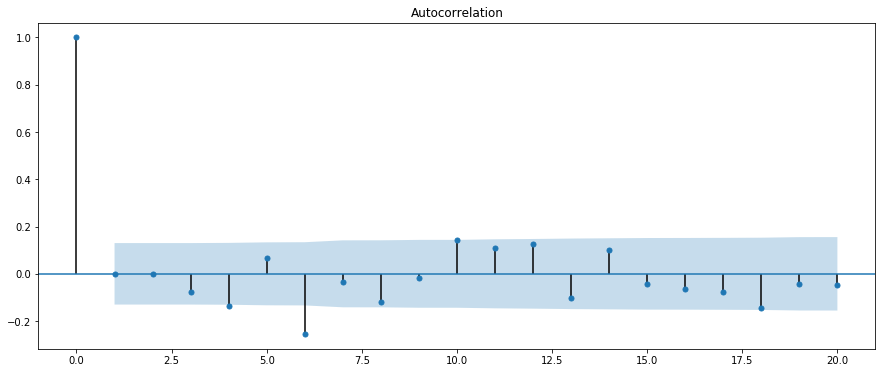

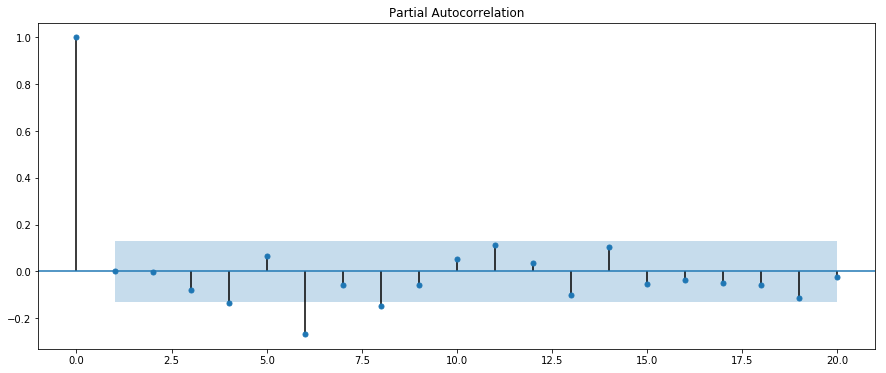

In [807]:
mam = df['Milk.Prod']
stl = decompose(mam,period=12)

#mam.head()

date = stl.resid

model = ARIMA(date,order=(1,1,1),freq='M')
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))
plot_acf(ma1.resid,lags=20)
plt.show()
plot_pacf(ma1.resid,lags=20)
plt.show()

The standard error of the ar1 coeficient is only about half its value. This model seems to be a reasonable fit. (does it?)

Next, plot the ACF and PACF of the model by executing the code in the cell below.
Note that only the 0 lag of the ACF is significant and that there are no significant lags for the PACF. These observations indicate that the ARIMA(1,1,1) model is a good fit. Compare these results to those of the MA(3) and AR(1) models, noting that they are nearly identical. 

The ARIMA(1,1,1) model is a good choice for these data as well. 


## Modeling and Forecasting

Now that you have explored the properties of the decomposed time series, you will now compute forecasts of dairy product production. In this exercise you will compute a time series model using the R **forecast** package, and use this model to forecast the next 12 months of dairy product production. 

The R **forecast** package contains the **auto.arima** function which automatically steps through the ARIMA model parameters to find the best fit to the data. The ARIMA model used in the **forecast** package also includes modeling of seasonal differences.  The **auto.arima** function has multiple arguments, specifying the range of parameter values to search. The first argument is a time series object of class **ts**. 

TODO (in python):

- Creates a time series of class **ts**.
- Automatically finds and computes an ARIMA model.
- Prints a summary of the ARIMA model.

Execute the code in the cell below to compute and print the summary of the ARIMA model. 


In [839]:
mam = df['Milk.Prod']
stl = decompose(mam,period=12)

date = stl.resid

model = ARIMA(date,order=(1,0,2),freq='M')
#print(model.score)
ma1 = model.fit()
#print(ma1.params)
print(ma1.summary(0.05))

                              ARMA Model Results                              
Dep. Variable:              Milk.Prod   No. Observations:                  228
Model:                     ARMA(1, 2)   Log Likelihood                 380.350
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sun, 07 Jan 2018   AIC                           -750.701
Time:                        21:14:18   BIC                           -733.554
Sample:                    01-01-1995   HQIC                          -743.782
                         - 12-01-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0126      0.015      0.863      0.389      -0.016       0.041
ar.L1.Milk.Prod     0.7652      0.065     11.773      0.000       0.638       0.893
ma.L1.Milk.Prod    -0.0061      

In [855]:
parameters = ma1.params

In [869]:
adds = pd.DataFrame(model.predict(parameters,start='2013-12-01',end='2015-12-01'))

In [874]:
df.DateTime

1995-01-01   1995-01-01
1995-02-01   1995-02-01
1995-03-01   1995-03-01
1995-04-01   1995-04-01
1995-05-01   1995-05-01
1995-06-01   1995-06-01
1995-07-01   1995-07-01
1995-08-01   1995-08-01
1995-09-01   1995-09-01
1995-10-01   1995-10-01
1995-11-01   1995-11-01
1995-12-01   1995-12-01
1996-01-01   1996-01-01
1996-02-01   1996-02-01
1996-03-01   1996-03-01
1996-04-01   1996-04-01
1996-05-01   1996-05-01
1996-06-01   1996-06-01
1996-07-01   1996-07-01
1996-08-01   1996-08-01
1996-09-01   1996-09-01
1996-10-01   1996-10-01
1996-11-01   1996-11-01
1996-12-01   1996-12-01
1997-01-01   1997-01-01
1997-02-01   1997-02-01
1997-03-01   1997-03-01
1997-04-01   1997-04-01
1997-05-01   1997-05-01
1997-06-01   1997-06-01
                ...    
2011-07-01   2011-07-01
2011-08-01   2011-08-01
2011-09-01   2011-09-01
2011-10-01   2011-10-01
2011-11-01   2011-11-01
2011-12-01   2011-12-01
2012-01-01   2012-01-01
2012-02-01   2012-02-01
2012-03-01   2012-03-01
2012-04-01   2012-04-01
2012-05-01   201